In [13]:
import numpy as np
import pandas as pd
import os

In [42]:
os.chdir('/content/sample_data/')
data = pd.read_csv('/content/sample_data/Data.csv')

In [43]:
data.shape

(1000, 82)

In [4]:
data.describe()

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
count         1000.000000       1000.000000           1000.000000   
mean             4.128000         88.260452             73.275860   
std              1.466891         30.161661             33.938301   
min              1.000000          9.475850             10.320800   
25%              3.000000         72.603119             52.388432   
50%              4.000000         86.522480             60.105792   
75%              5.000000        102.517365             86.864267   
max              9.000000        208.980400            208.980400   

       gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
count        1000.000000            1000.000000          1000.000000   
mean           71.904641              58.658729             1.168370   
std            31.456155              37.062144             0.364849   
min             9.130513               7.231416             0.000000   
25%            58.637102              35.363917             0.956337   
50%            66.935044              39.784929             1.199541   
75%            78.431264              72.724597             1.444537   
max           208.980400             208.980400             1.983797   

       wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
count              1000.000000        1000.000000            1000.000000   
mean                  1.064396         115.165378              33.126235   
std                   0.405535          55.897294              28.080379   
min                   0.000000           0.000000               0.000000   
25%                   0.734050          78.216139              15.867140   
50%                   1.147461         122.906070              26.332050   
75%                   1.355941         155.193125              37.892723   
max                   1.880860         207.972460             188.202434   

       std_atomic_mass  ...  wtd_mean_Valence  gmean_Valence  \
count      1000.000000  ...       1000.000000    1000.000000   
mean         44.164284  ...          3.169322       3.080053   
std          20.606446  ...          1.229280       1.095969   
min           0.000000  ...          1.444444       1.189207   
25%          32.338500  ...          2.108236       2.289428   
50%          44.956454  ...          2.598636       2.605171   
75%          58.502000  ...          4.001250       3.843490   
max         100.129500  ...          6.830000       6.480741   

       wtd_gmean_Valence  entropy_Valence  wtd_entropy_Valence  range_Valence  \
count        1000.000000      1000.000000          1000.000000    1000.000000   
mean            3.074345         1.295734             1.052072       2.027000   
std             1.219345         0.402333             0.386490       1.246525   
min             1.360790         0.000000             0.000000       0.000000   
25%             2.084117         1.057905             0.758907       1.000000   
50%             2.427333         1.368922             1.185079       2.000000   
75%             3.917426         1.589027             1.333084       3.000000   
max             6.818943         2.141963             1.867279       5.000000   

       wtd_range_Valence  std_Valence  wtd_std_Valence  critical_temp  
count        1000.000000  1000.000000      1000.000000    1000.000000  
mean            1.477028     0.832400         0.657258      33.934664  
std             0.977762     0.482889         0.455270      34.585437  
min             0.000000     0.000000         0.000000       0.001000  
25%             0.922620     0.471405         0.295699       5.015000  
50%             1.061323     0.800000         0.489898      18.050000  
75%             1.910800     1.200000         1.007274      60.500000  
max             5.872000     2.357023         2.046338     137.400000  

[8 rows x 82 columns]

##### (a) Preprocess the dataset by checking for NaN values and standardizing the dataset.

In [44]:
# Checking for any missing values in the dataset
data.isnull().isna().values.any()

False

In [45]:
# Checking for any missing values in the dataset using another way
missing_values = data.isnull()

In [46]:
# Counting the number of missing values in each column
num_missing = missing_values.sum()
for i in num_missing:
  if i !=0:
    print(i)

##### Dividing the dataset into input and output. Here critical_temp column is the output column and rest of the columns are considered as input columns. next I am dividing input and output dataset into train and test with the 80 20 ratio and random state 42


In [47]:
output_data = data[['critical_temp']]
input_data = data.drop('critical_temp', axis=1) 

In [48]:
from sklearn.model_selection import train_test_split
#spliting the data into train and test with 80 and 20 ratio with the random state 42
x_train, x_test, y_train, y_test = train_test_split(input_data,output_data, test_size = 0.2, random_state = 42)

##### Stadardizing the dataset using StandardScaler

In [49]:
from sklearn.preprocessing import StandardScaler
sts = StandardScaler()
stadardize_x_train=sts.fit_transform(x_train)
stadardize_x_test=sts.fit_transform(x_test)

##### (b) Fit a linear regression model to the training dataset. Perform regression diagnostics and report on the validity of ordinary least-squares assumptions. Generate necessary plots as a part of diagnostics.

In [50]:
import statsmodels.api as sm
ols_model = sm.OLS(y_train, sm.add_constant(stadardize_x_train)).fit()
# display(ols_model.summary())

In [51]:
from sklearn.metrics import r2_score, mean_squared_error,  mean_absolute_error
#Model performance on train dataset
y_predict = ols_model.fittedvalues
r2_score_LR=r2_score(y_train,y_predict)
mean_squared_error_LR=mean_squared_error(y_train,y_predict)
print("R square value:",r2_score_LR)
print("Mean Squared Error is:",mean_squared_error_LR)
print("RMSE value is:",np.sqrt(mean_squared_error_LR))
print('MAE value:', mean_absolute_error(y_train,y_predict))

R square value: 0.749617383162657
Mean Squared Error is: 307.64351827770275
RMSE value is: 17.539769618717994
MAE value: 13.374696001697144


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sms
from scipy.stats.stats import pearsonr
from statsmodels.compat import lzip
def ols_model_diagnostics_stat(feature,input_dataset,target_dataset):
    ols_model = sm.OLS(target_dataset, sm.add_constant(input_dataset)).fit()
    residuals = ols_model.resid
    std_residuals = ols_model.get_influence().resid_studentized_internal
    mean_residuals = np.mean(std_residuals)
    print("Normality of Error: {}".format(mean_residuals))
    p = sns.displot(std_residuals, kde=True)
    p = plt.title("Normality of error terms/residuals")
    plt.show()
    sm.qqplot(std_residuals, line="s")
    plt.show()
    for i in range(len(feature)):
        feat=feature[i]
        p = sns.scatterplot(x=x_train[feat], y=residuals)
        plt.xlabel(feat)
        plt.ylabel("Residuals")
        plt.show()
        p = sns.scatterplot(x=x_train[feat], y=std_residuals)
        plt.xlabel(feat)
        plt.ylabel("Standardized Residuals")
        plt.show()
        corr_test = pearsonr(x_train[feat], std_residuals)
        print('\nCorrelation of residuals for {}'.format(feat))
        print(corr_test[0])
    name = ["F statistic", "p-value"]
    test = sms.het_goldfeldquandt(std_residuals, x_train)
    print('F Statistic and P-Value',lzip(name, test))
    sm.graphics.tsa.plot_acf(std_residuals, lags=40)
    plt.show()

<ipython-input-34-f32739306ad2>:4: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


Normality of Error: -0.004312069553195599


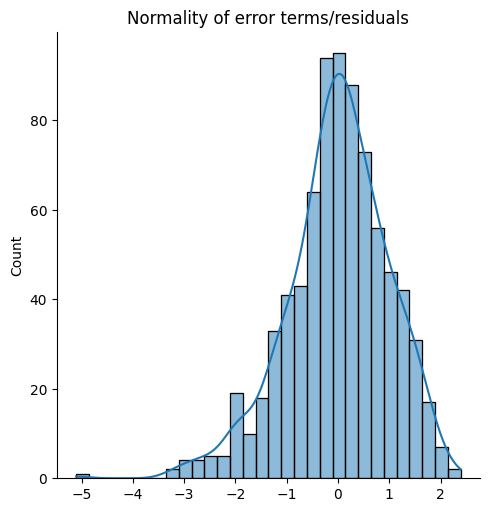

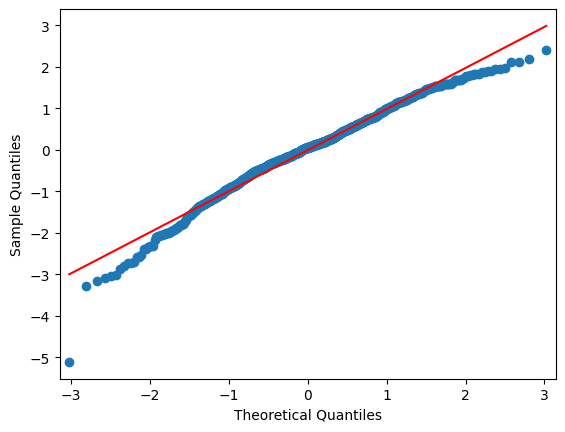

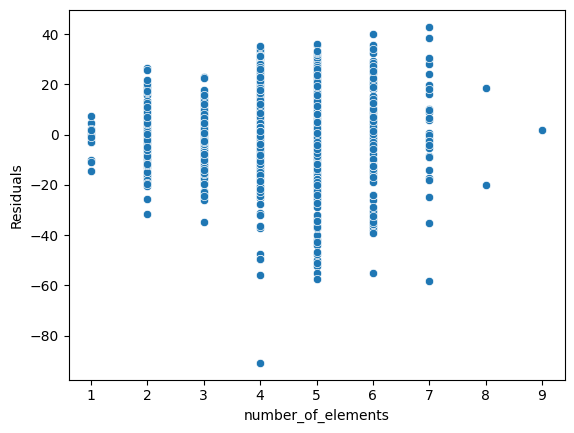

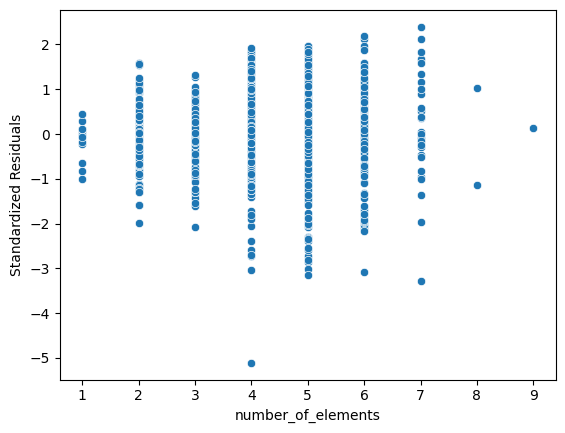


Correlation of residuals for number_of_elements
0.0040201253648746325


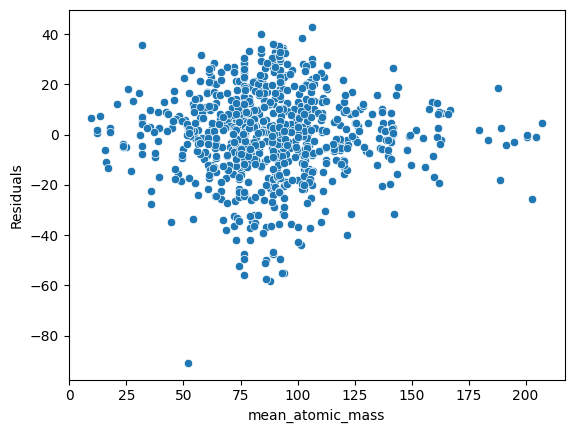

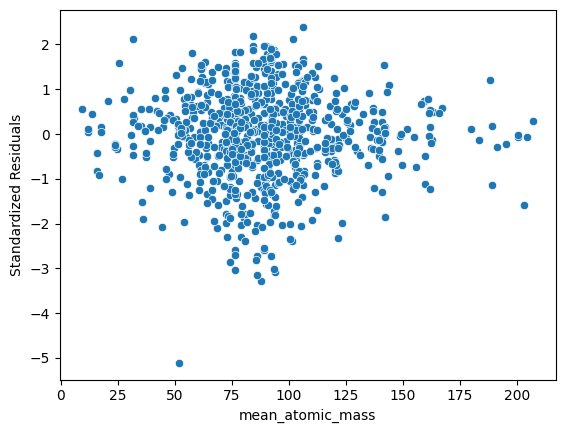


Correlation of residuals for mean_atomic_mass
-0.0007149371114578019


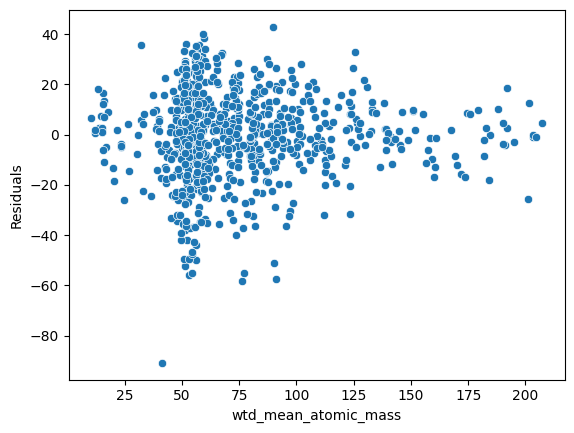

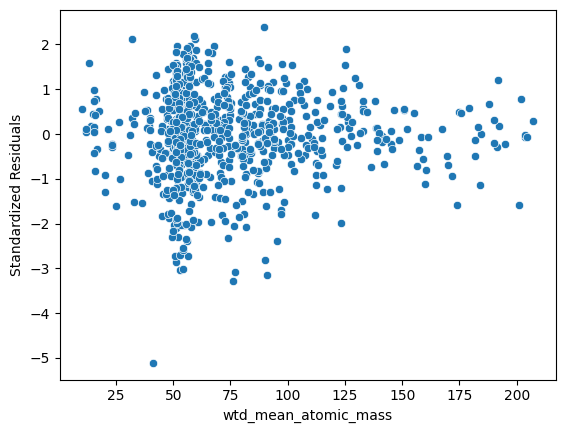


Correlation of residuals for wtd_mean_atomic_mass
-0.00245365706159276


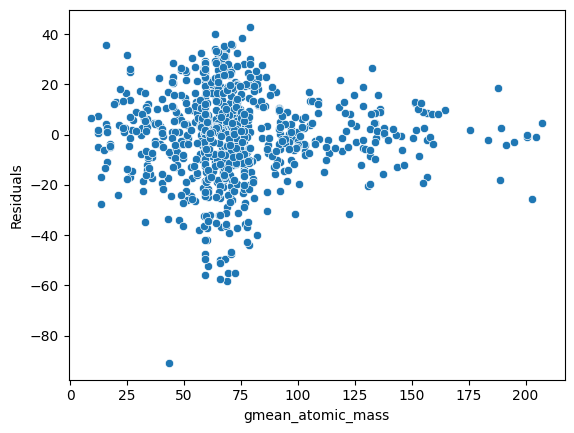

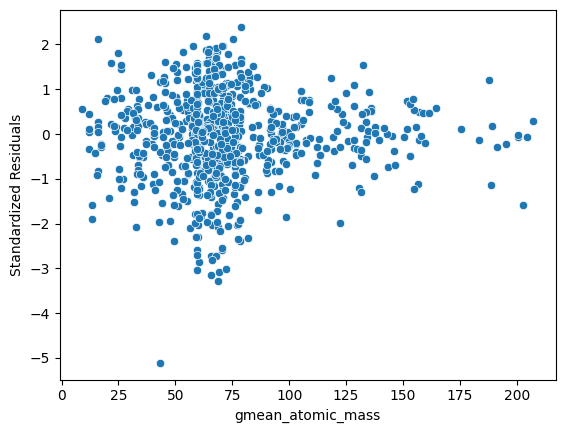


Correlation of residuals for gmean_atomic_mass
0.0009843167554721872


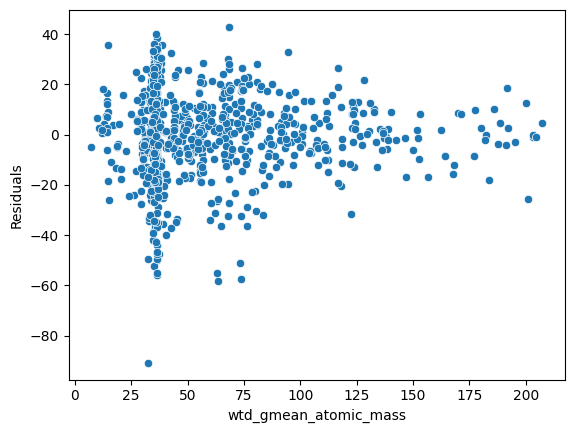

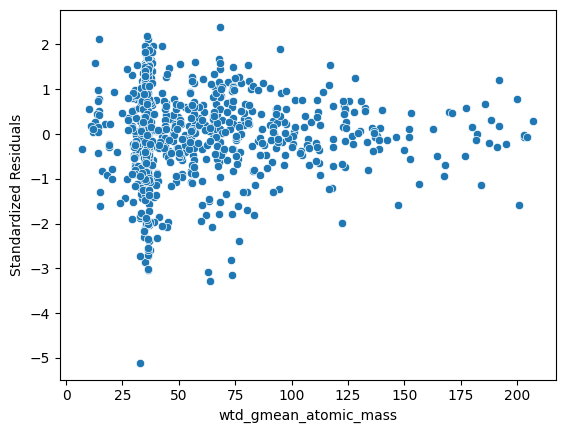


Correlation of residuals for wtd_gmean_atomic_mass
-0.002426204235239607


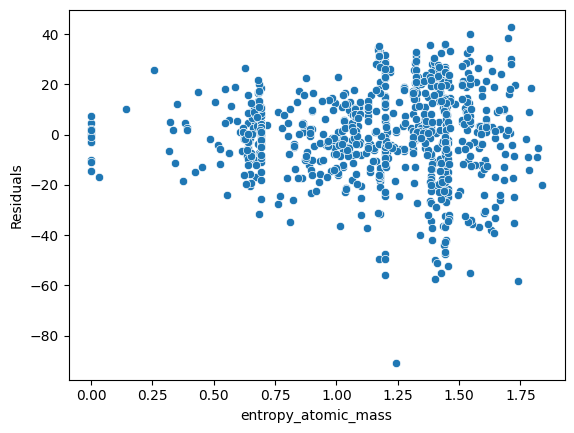

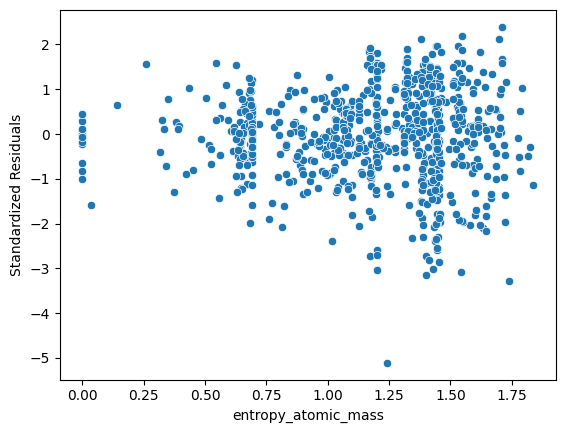


Correlation of residuals for entropy_atomic_mass
0.0063312308661754345


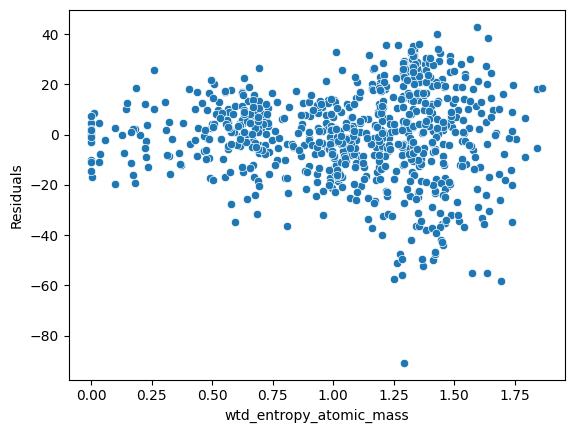

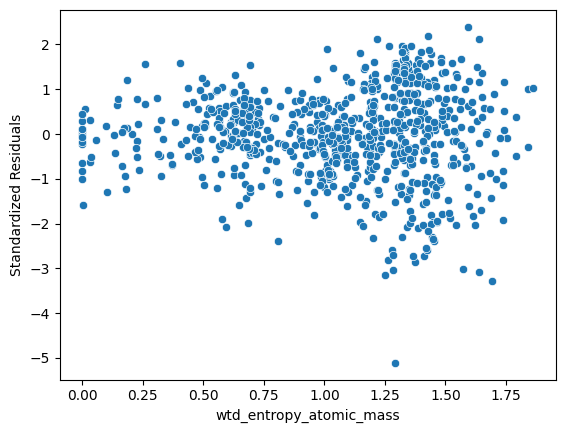


Correlation of residuals for wtd_entropy_atomic_mass
0.003980542498656912


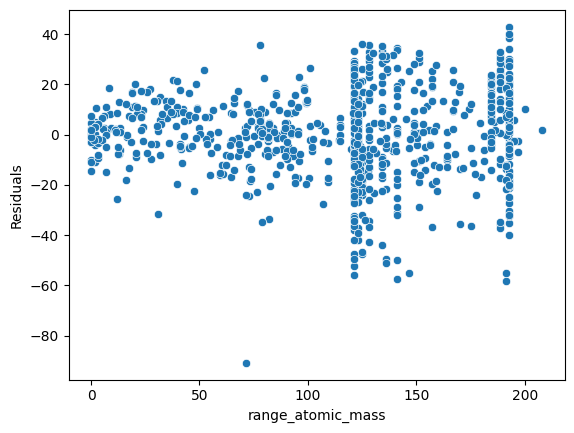

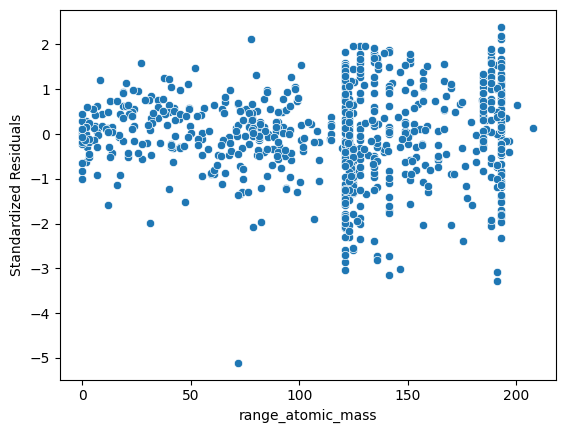


Correlation of residuals for range_atomic_mass
-0.0013553160754481673


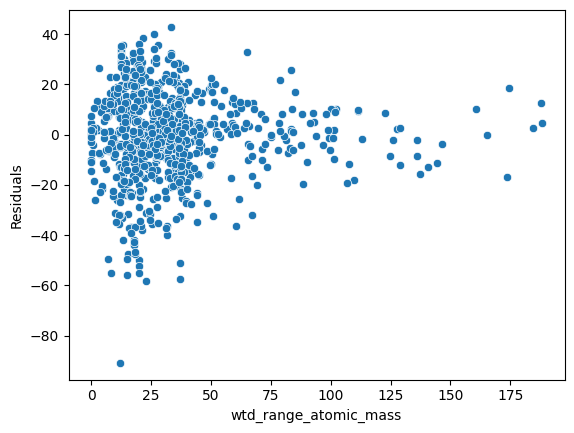

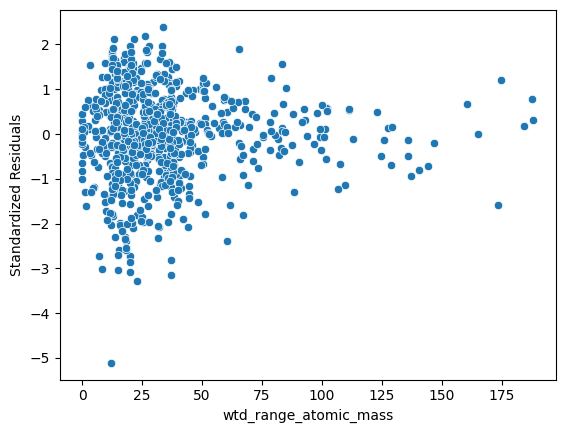


Correlation of residuals for wtd_range_atomic_mass
-0.001748121489458865


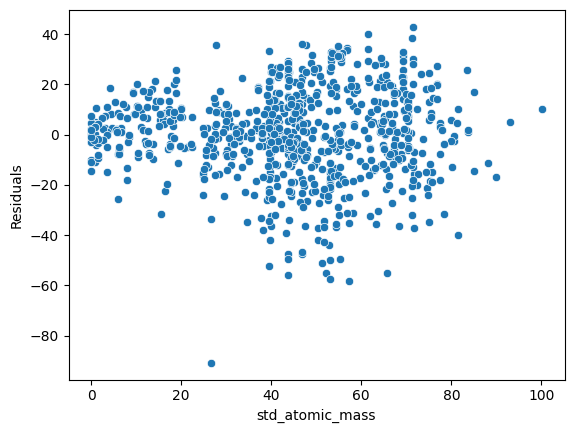

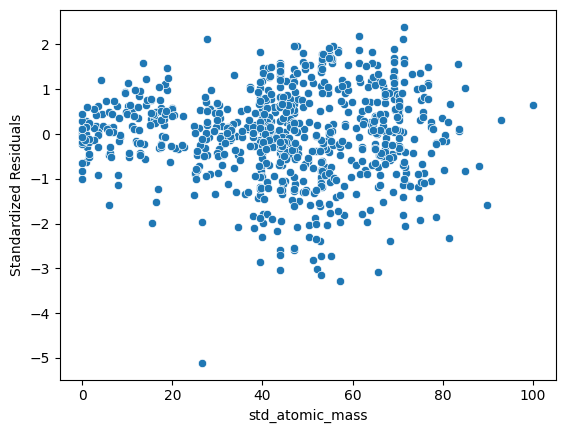


Correlation of residuals for std_atomic_mass
-0.002546056560992979


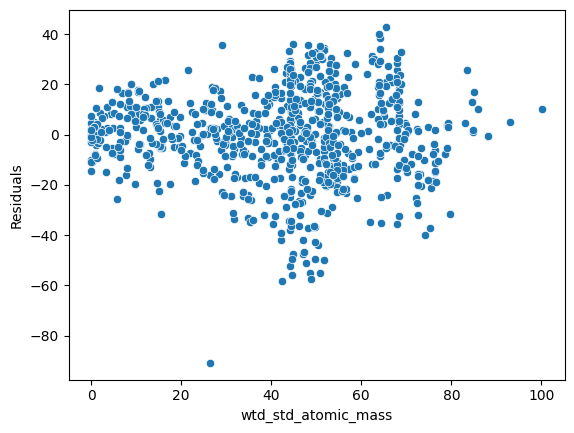

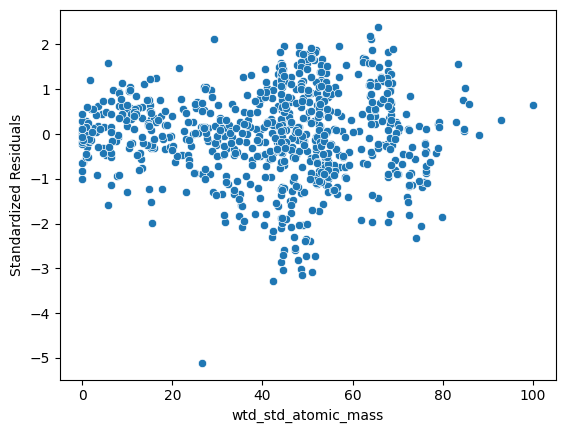


Correlation of residuals for wtd_std_atomic_mass
0.0008472836595844087


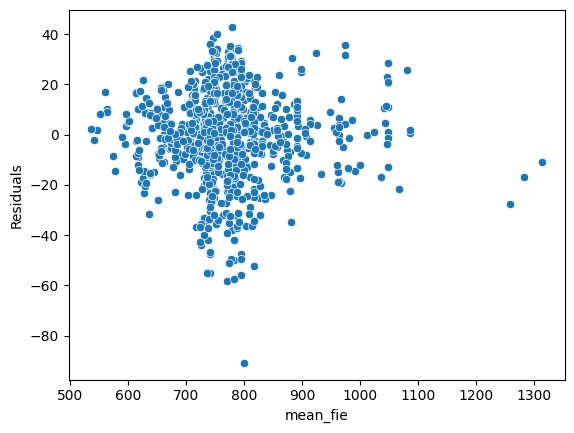

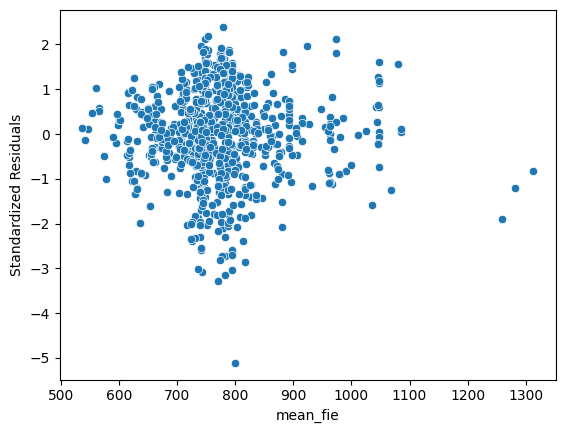


Correlation of residuals for mean_fie
-0.008101096457097185


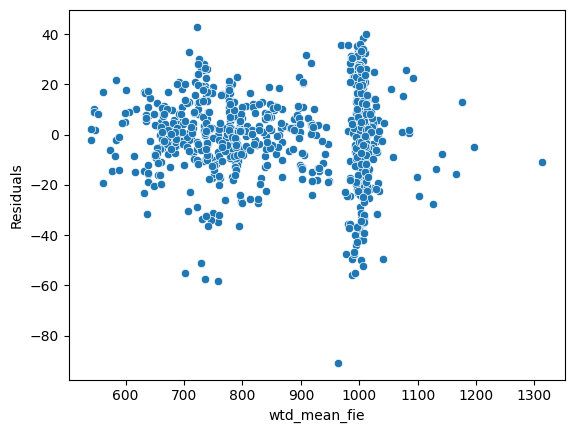

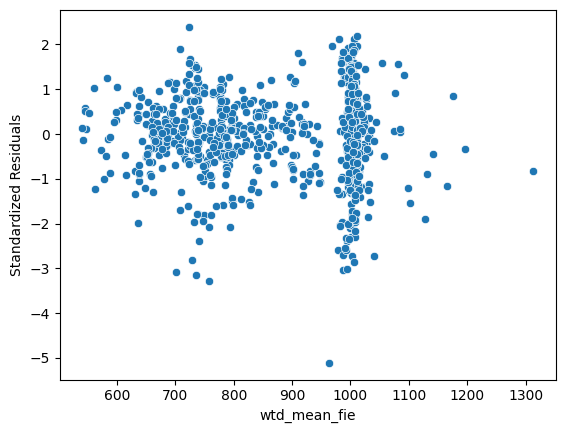


Correlation of residuals for wtd_mean_fie
-0.0004979901876359209


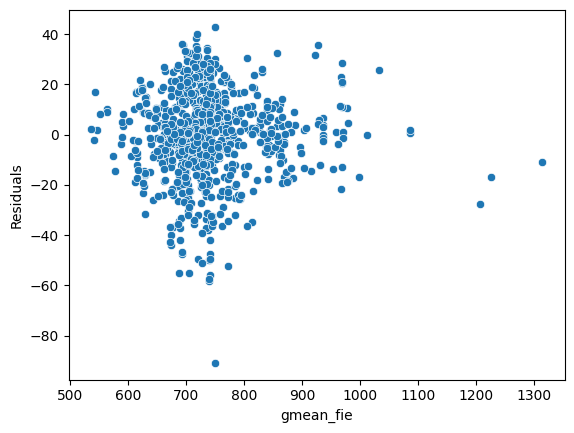

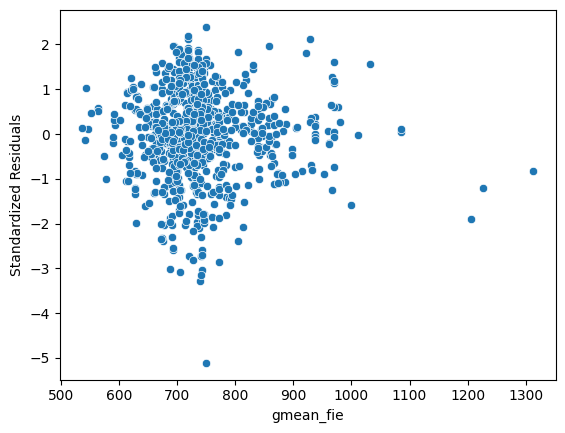


Correlation of residuals for gmean_fie
-0.008880166332022888


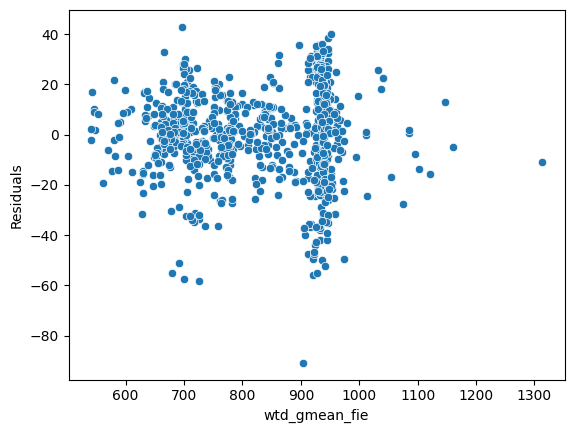

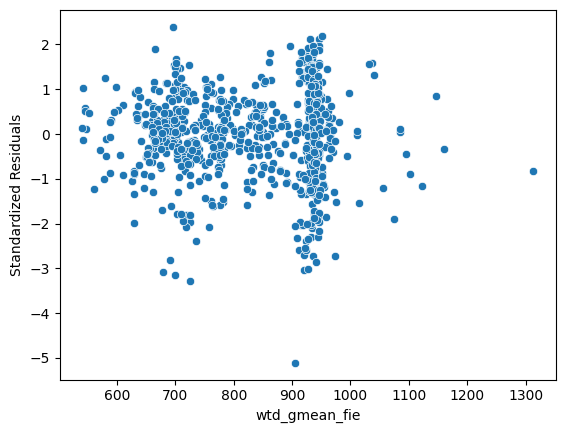


Correlation of residuals for wtd_gmean_fie
-0.0010258627996001038


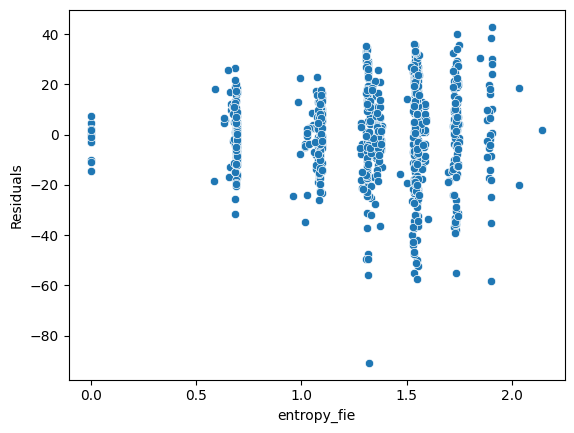

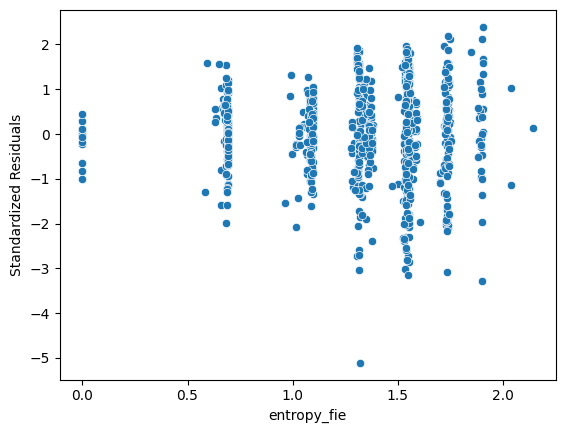


Correlation of residuals for entropy_fie
0.004122808670143652


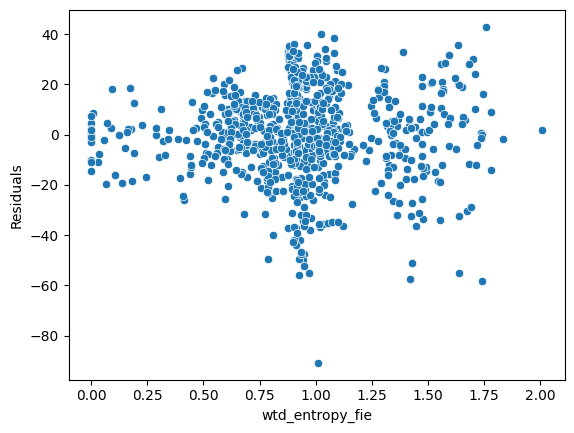

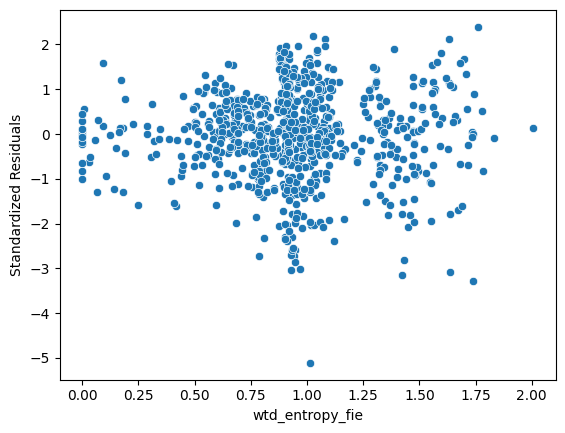


Correlation of residuals for wtd_entropy_fie
0.003133991970864348


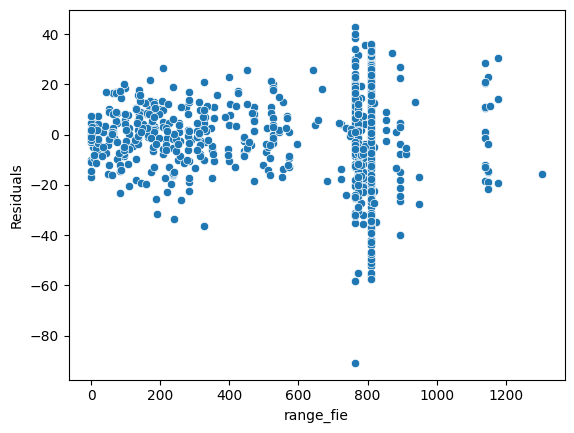

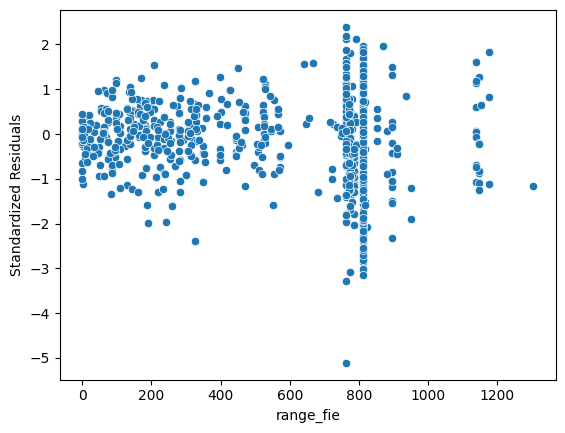


Correlation of residuals for range_fie
0.0008295508853218073


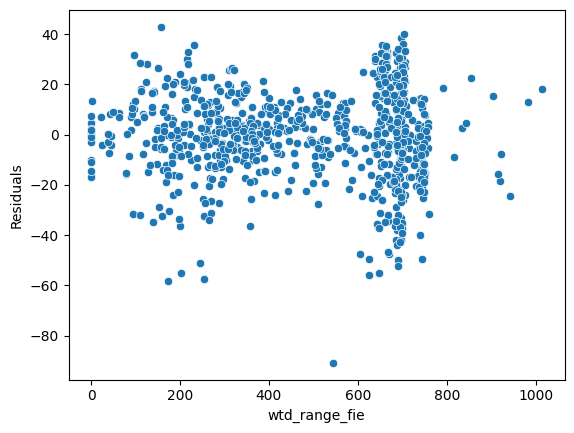

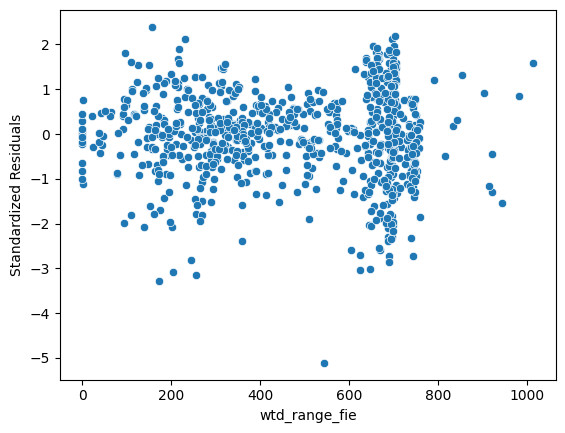


Correlation of residuals for wtd_range_fie
0.0010901559702694193


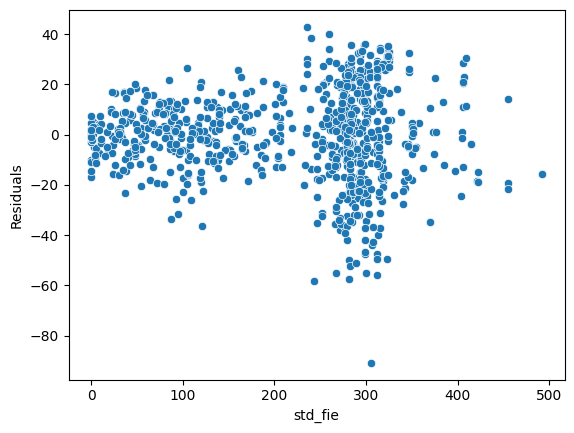

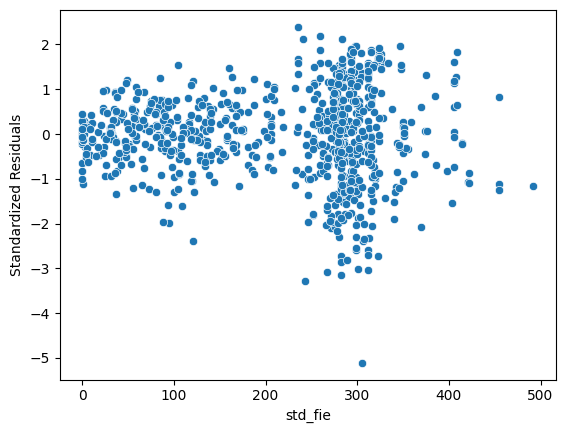


Correlation of residuals for std_fie
0.0004706950033866175


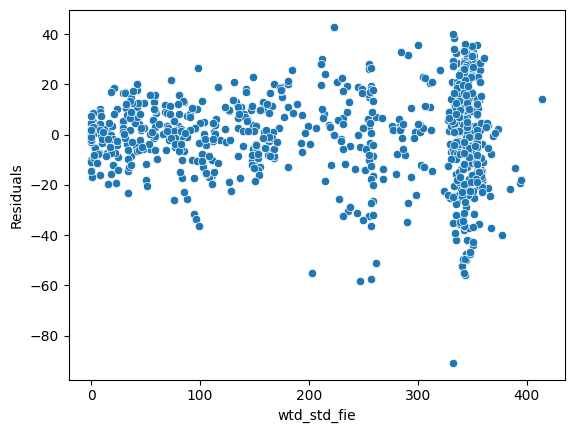

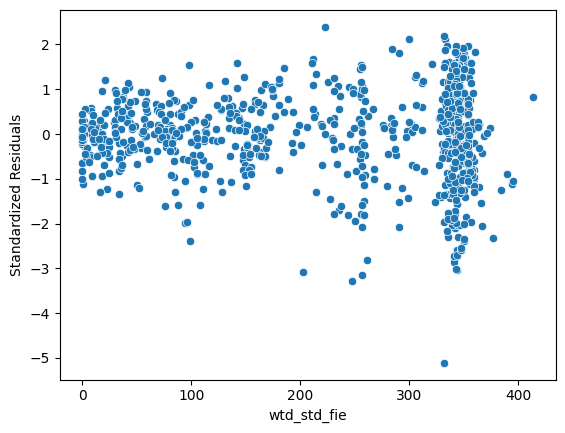


Correlation of residuals for wtd_std_fie
0.001968345111642407


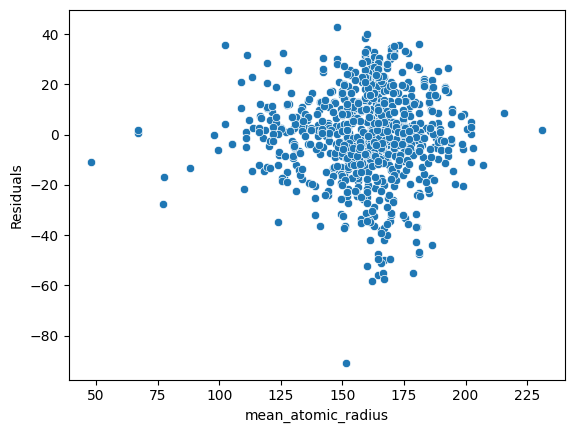

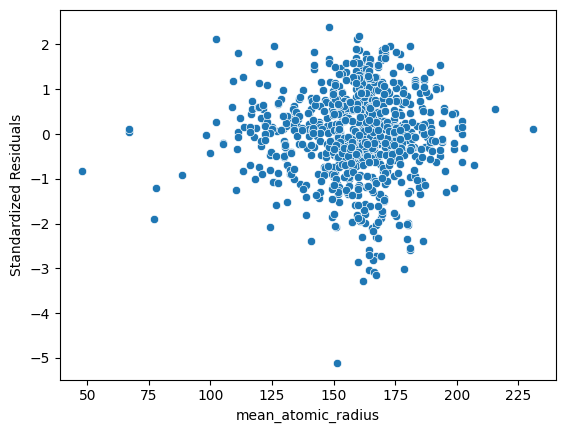


Correlation of residuals for mean_atomic_radius
0.0056772437613685466


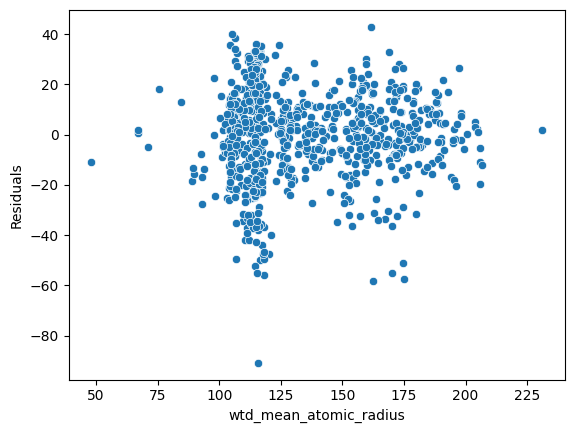

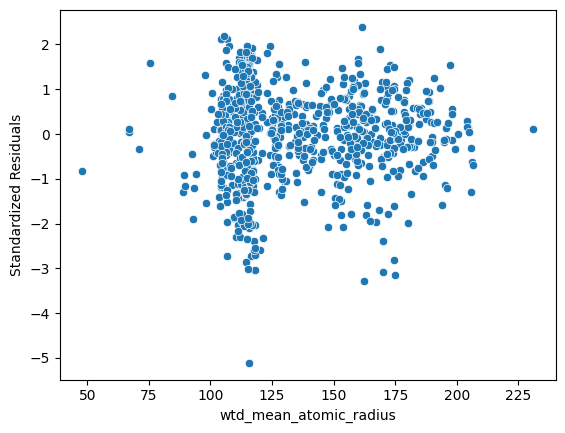


Correlation of residuals for wtd_mean_atomic_radius
-0.0009296578715347545


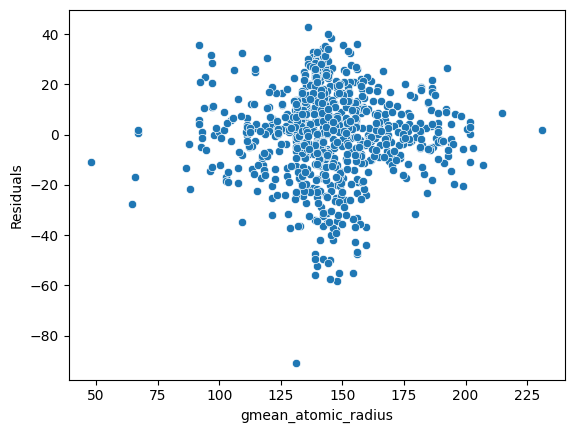

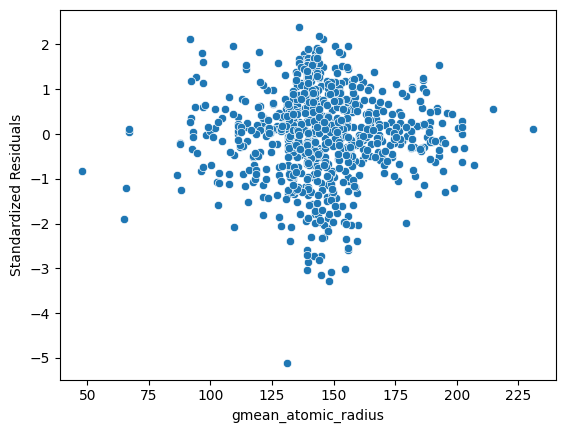


Correlation of residuals for gmean_atomic_radius
0.004795870747911244


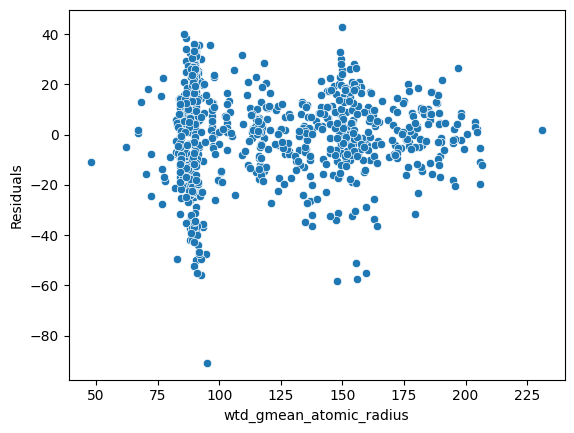

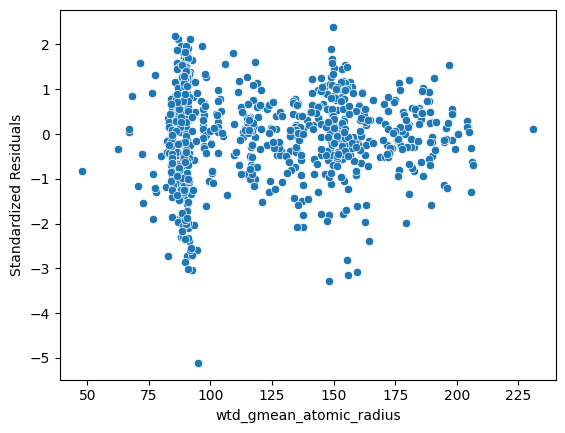


Correlation of residuals for wtd_gmean_atomic_radius
-0.001396260352338403


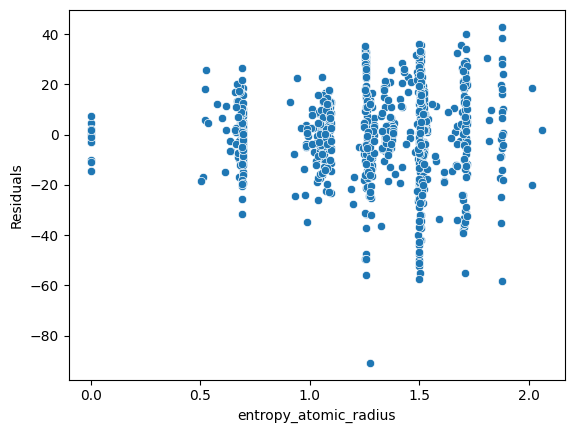

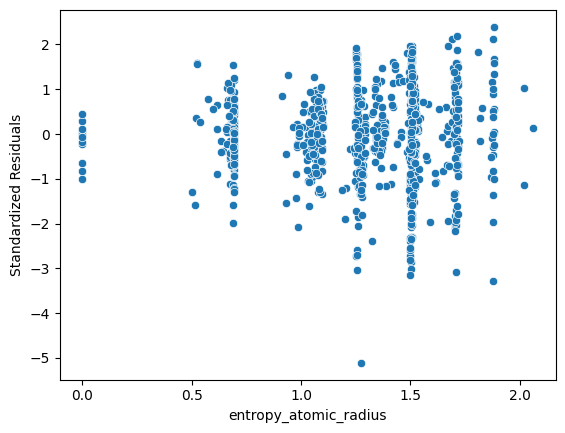


Correlation of residuals for entropy_atomic_radius
0.004505620189998964


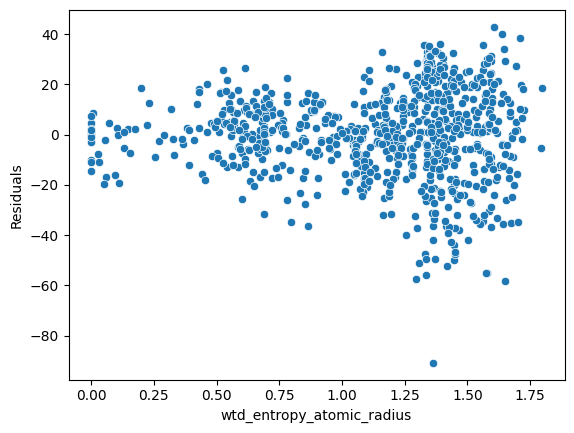

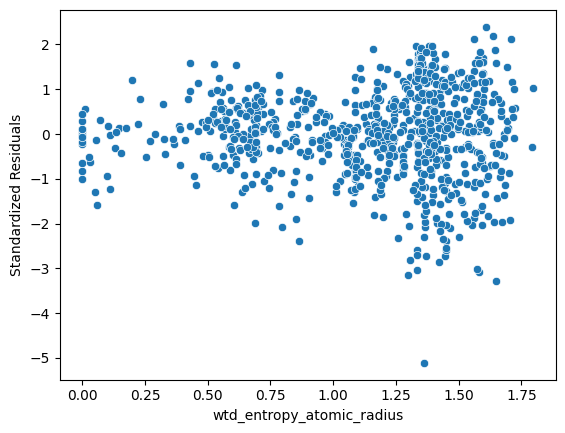


Correlation of residuals for wtd_entropy_atomic_radius
0.004534312260761737


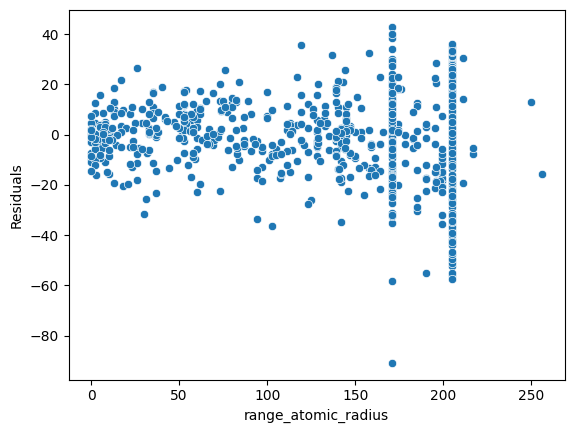

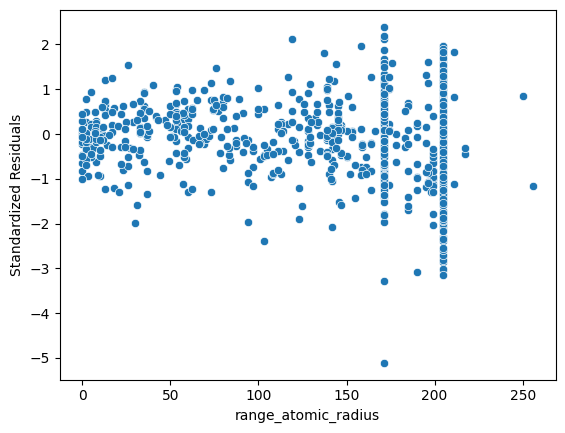


Correlation of residuals for range_atomic_radius
0.002474189715970824


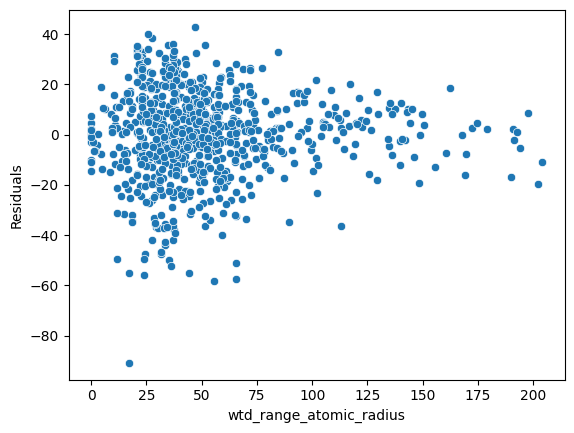

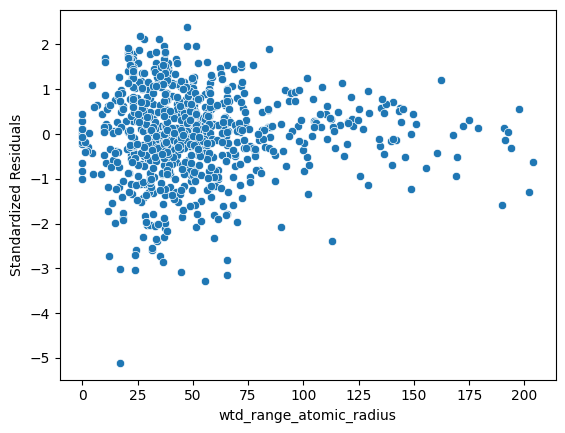


Correlation of residuals for wtd_range_atomic_radius
-0.0023021337378832194


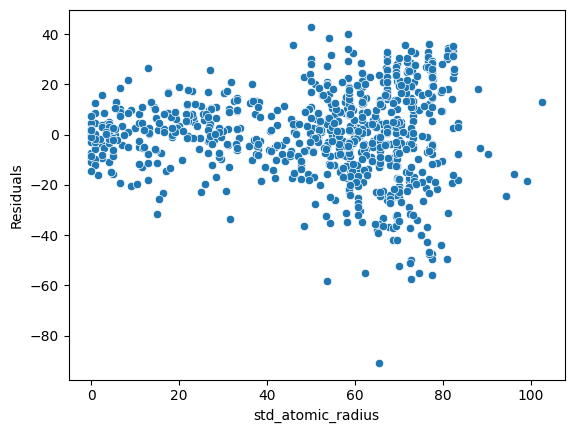

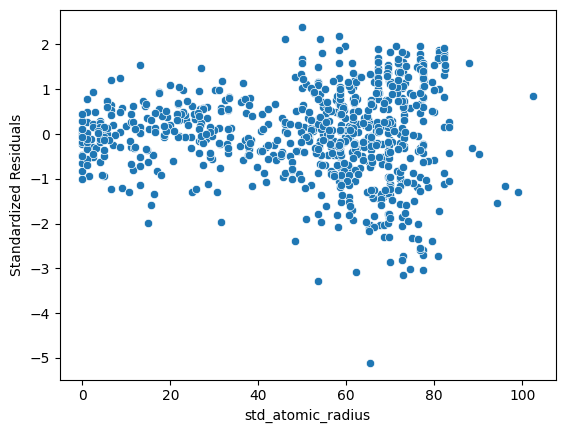


Correlation of residuals for std_atomic_radius
0.0017617691673515457


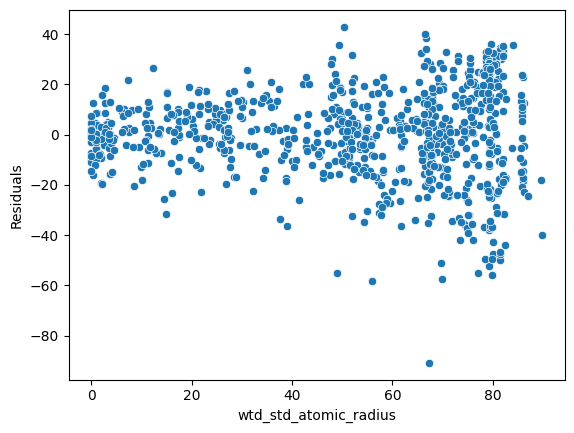

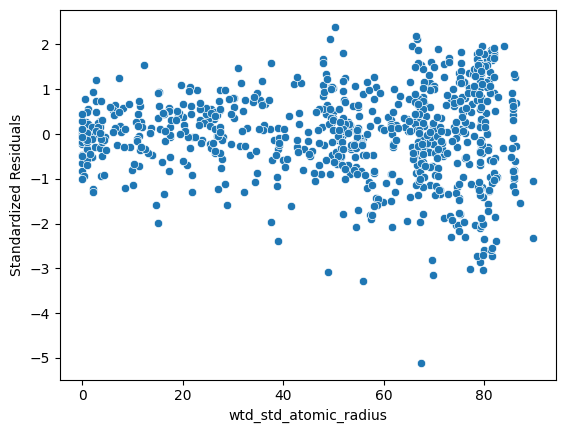


Correlation of residuals for wtd_std_atomic_radius
0.0026736139334840557


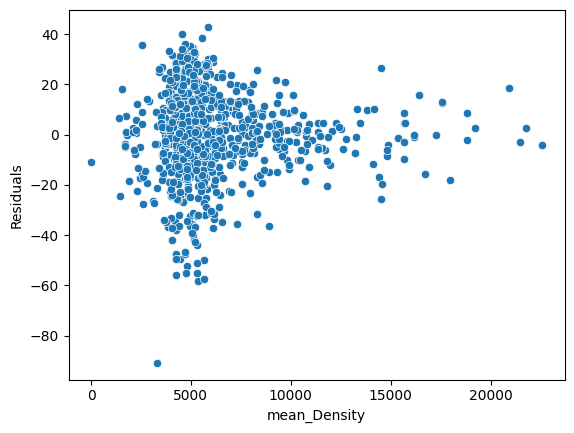

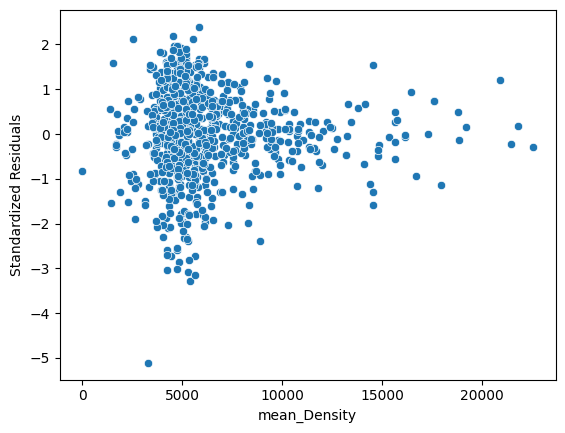


Correlation of residuals for mean_Density
-0.0004352025370447498


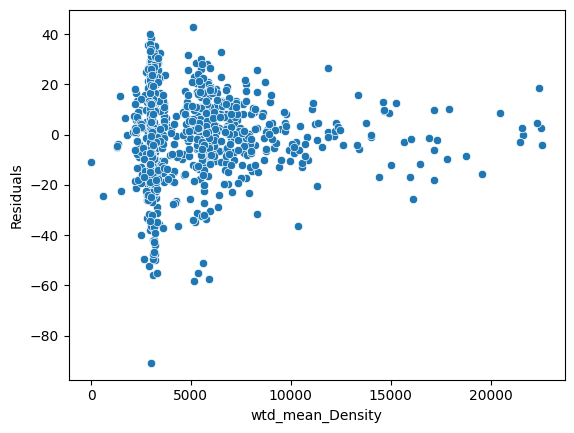

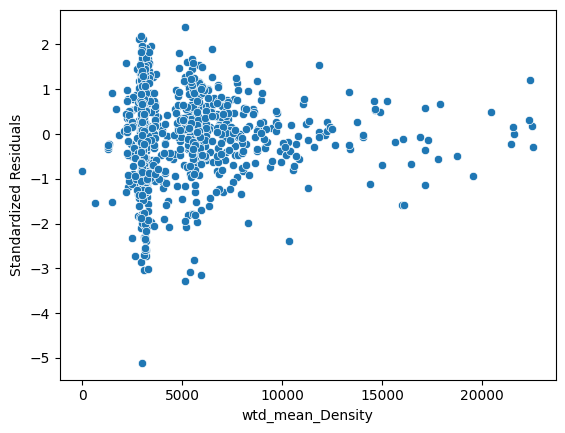


Correlation of residuals for wtd_mean_Density
-0.002036967791602961


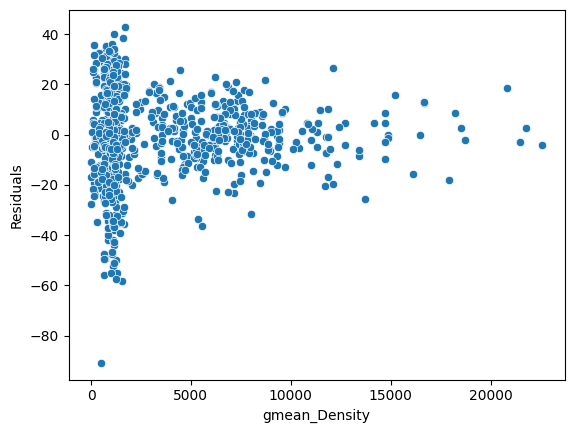

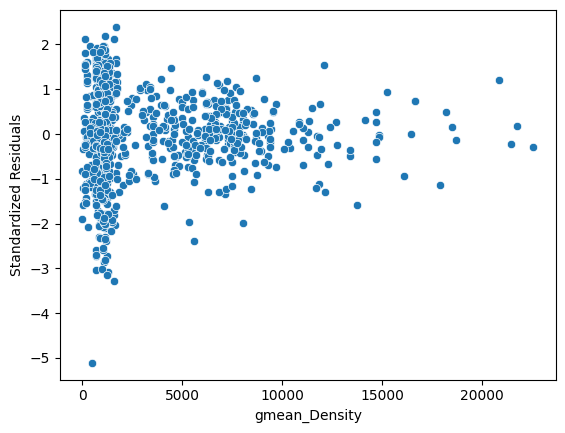


Correlation of residuals for gmean_Density
0.000493580362635122


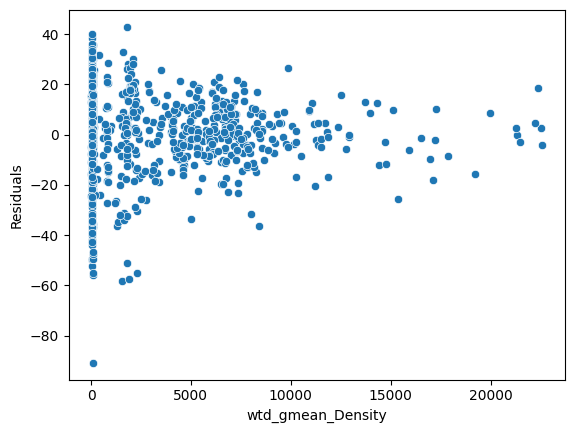

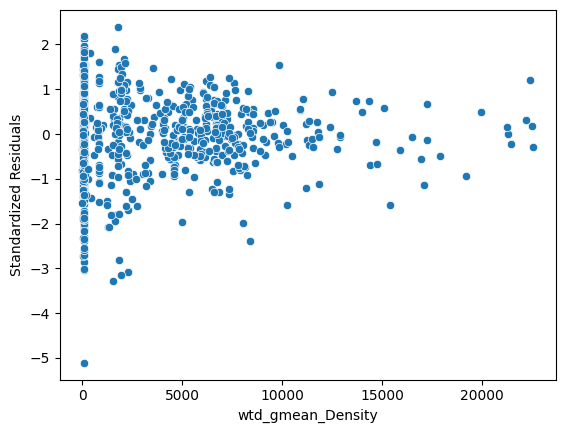


Correlation of residuals for wtd_gmean_Density
-0.0014534464357942173


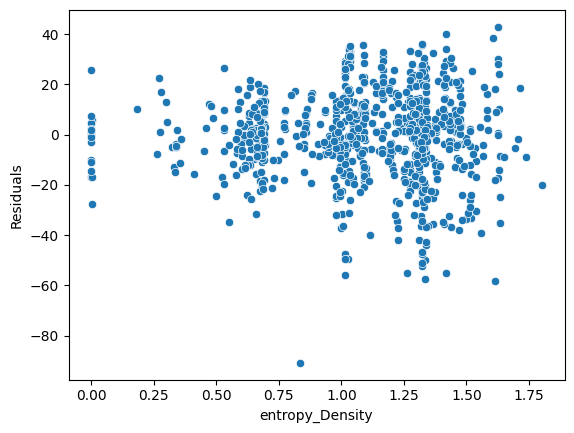

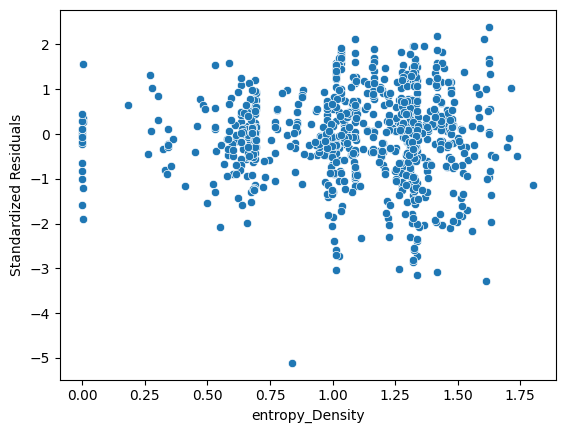


Correlation of residuals for entropy_Density
0.009148517507799436


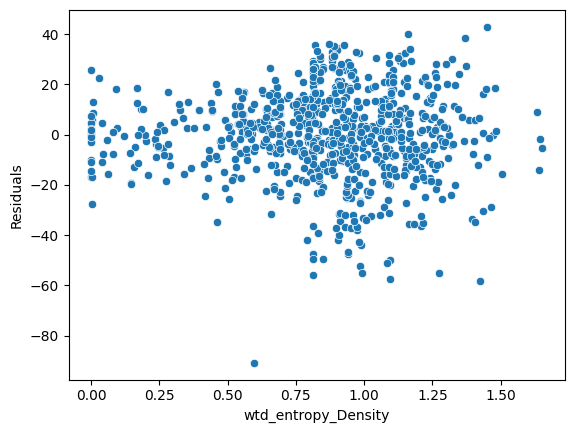

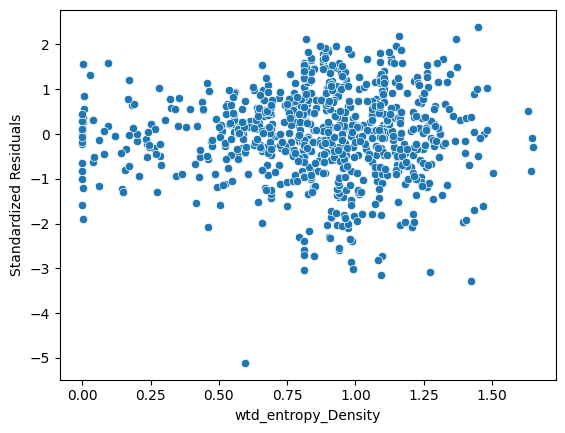


Correlation of residuals for wtd_entropy_Density
0.00575542669093131


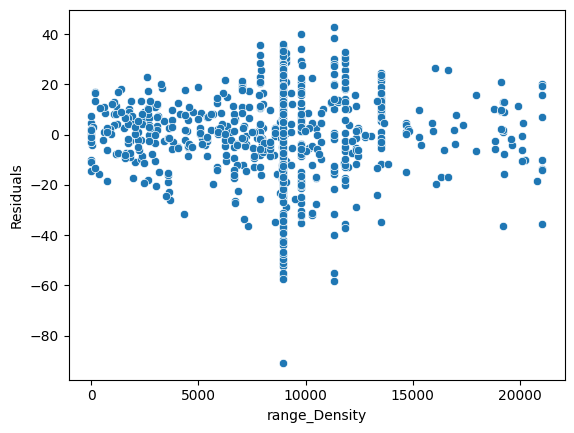

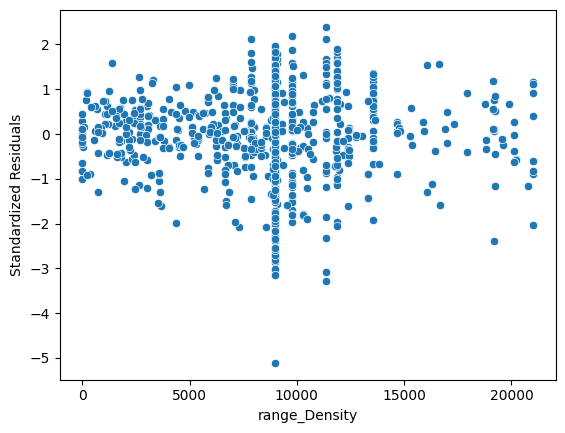


Correlation of residuals for range_Density
-0.003069260369575494


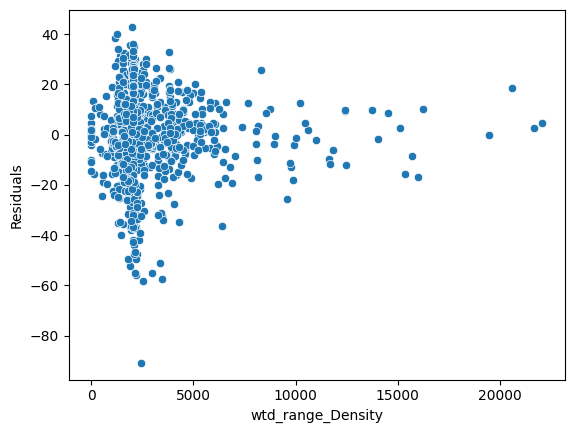

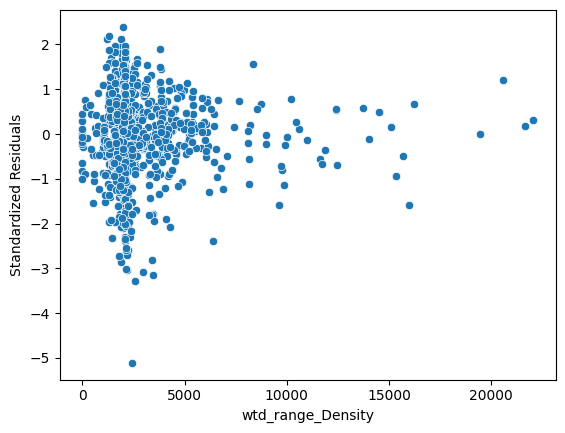


Correlation of residuals for wtd_range_Density
-0.001805809896837947


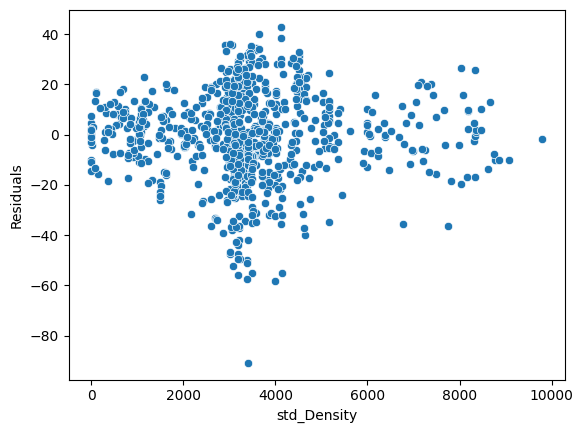

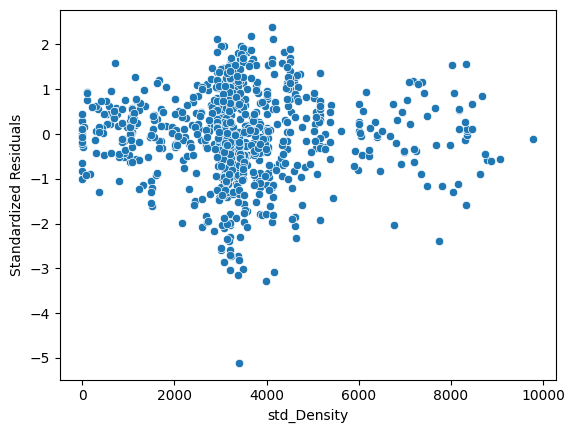


Correlation of residuals for std_Density
-0.00444697027585798


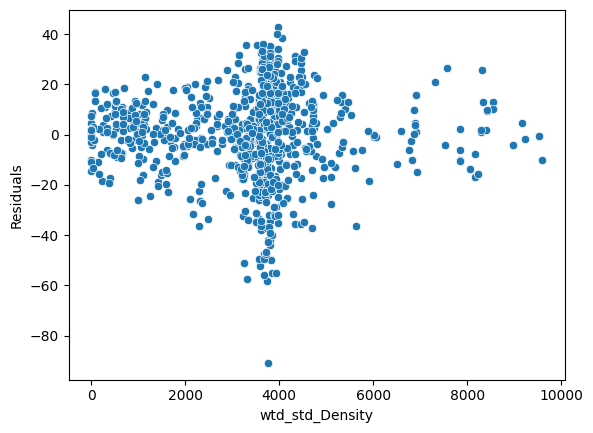

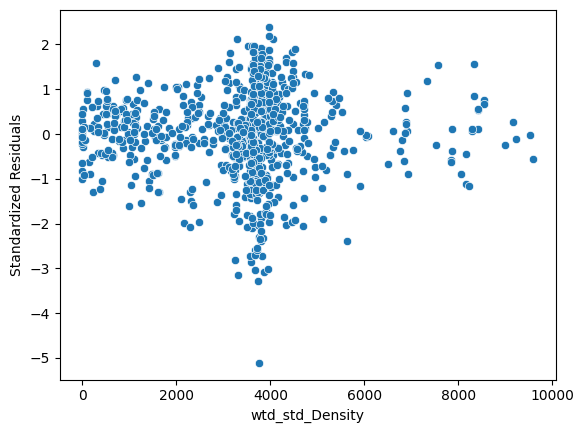


Correlation of residuals for wtd_std_Density
-0.0004494063013730674


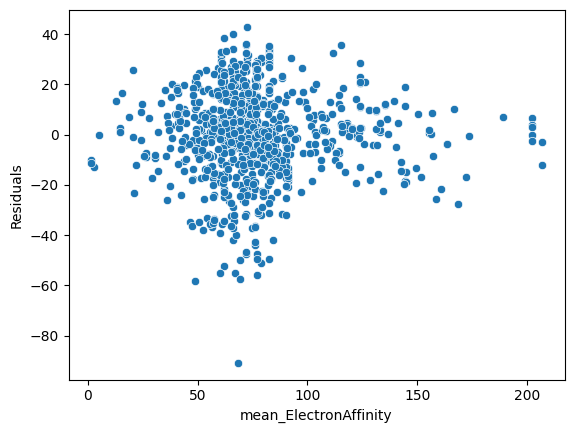

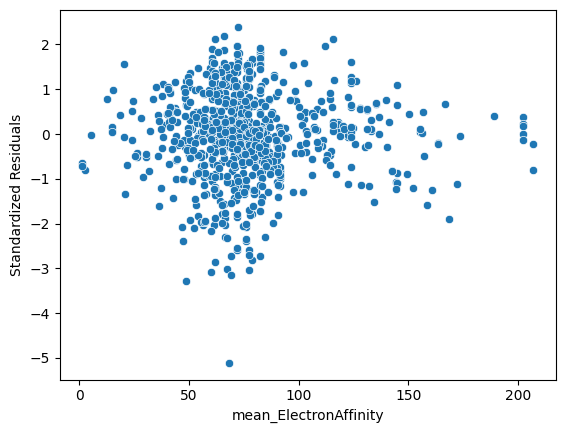


Correlation of residuals for mean_ElectronAffinity
-0.0031726250440506625


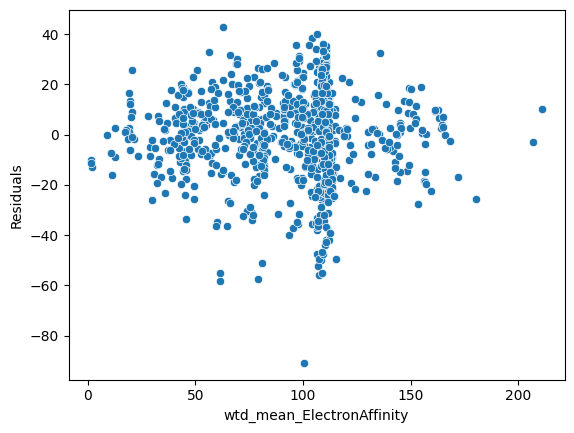

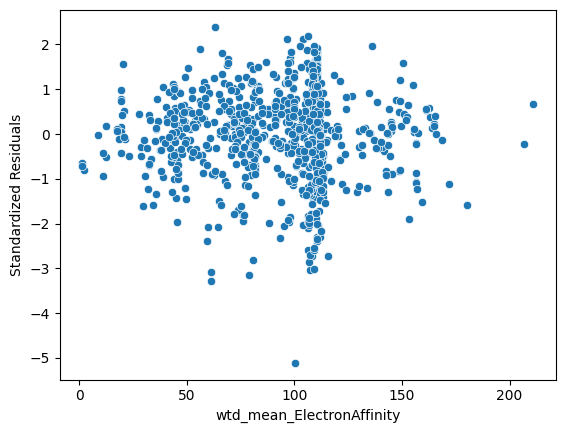


Correlation of residuals for wtd_mean_ElectronAffinity
0.0015814595078590572


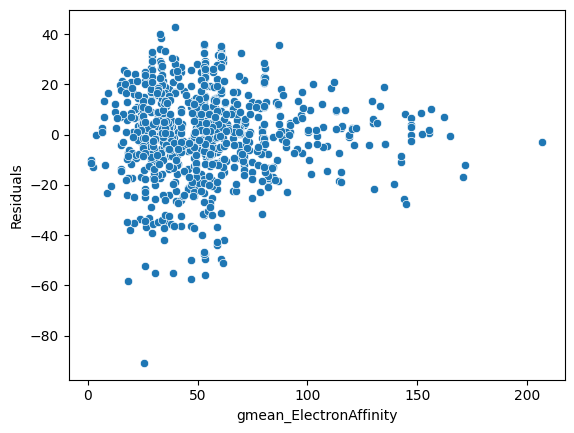

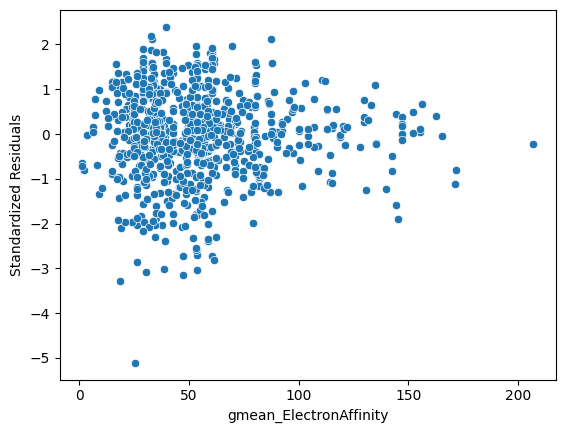


Correlation of residuals for gmean_ElectronAffinity
-0.0020715913200638637


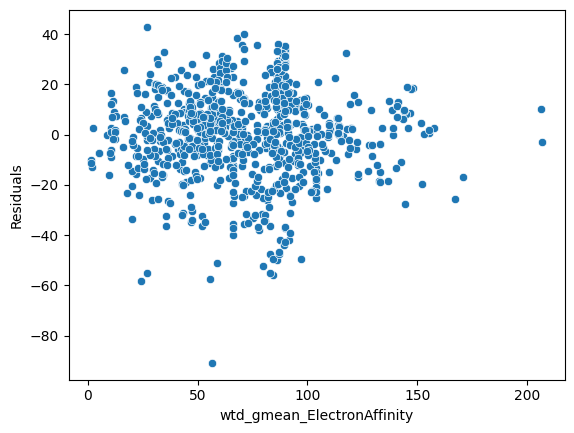

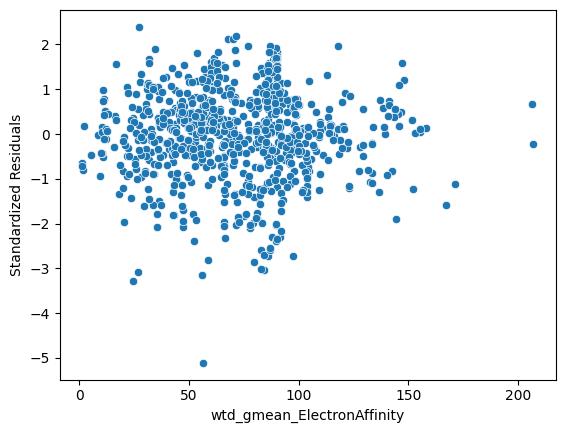


Correlation of residuals for wtd_gmean_ElectronAffinity
0.0018316308328346301


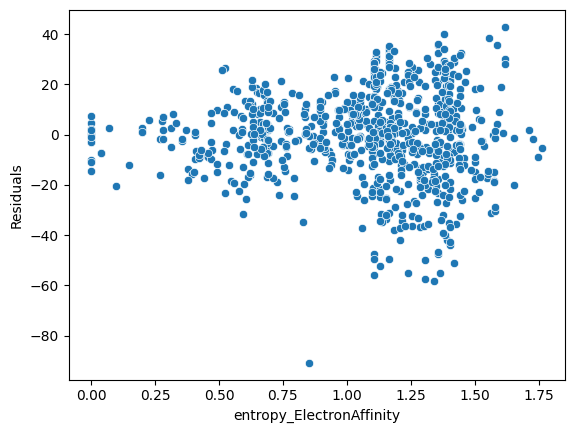

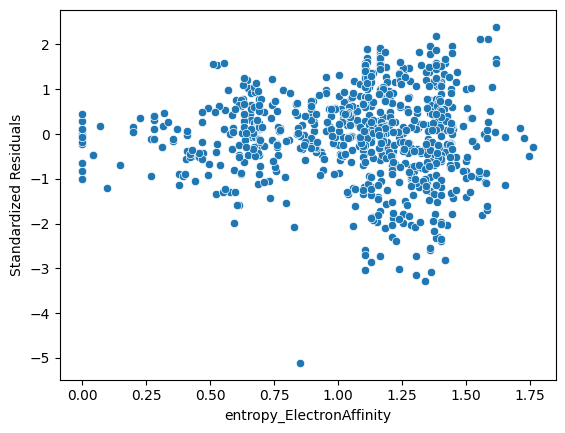


Correlation of residuals for entropy_ElectronAffinity
0.004198478255267337


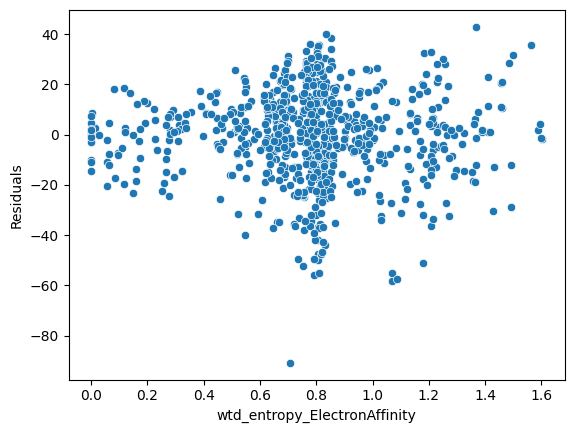

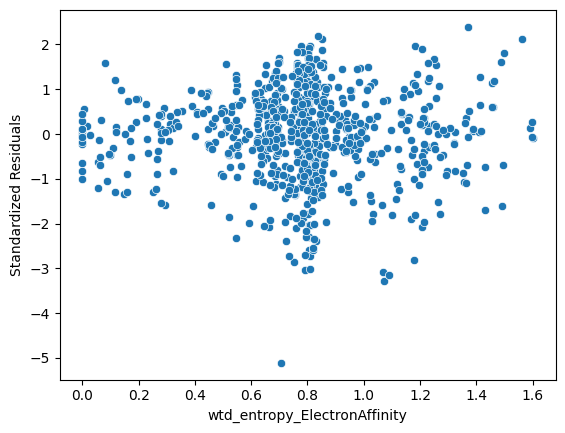


Correlation of residuals for wtd_entropy_ElectronAffinity
0.002970746212913172


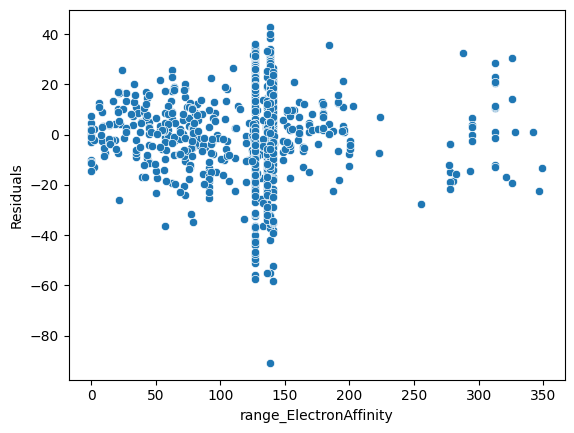

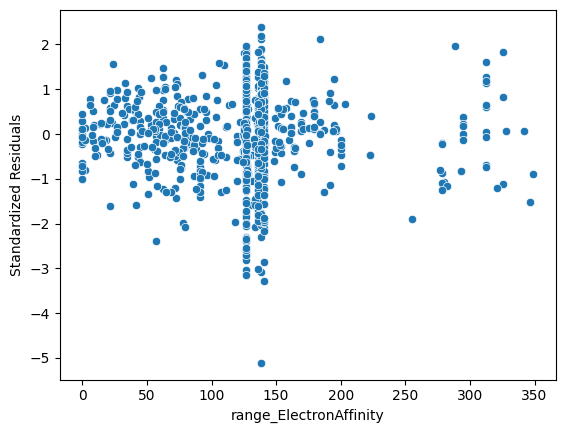


Correlation of residuals for range_ElectronAffinity
-0.0020166827571270482


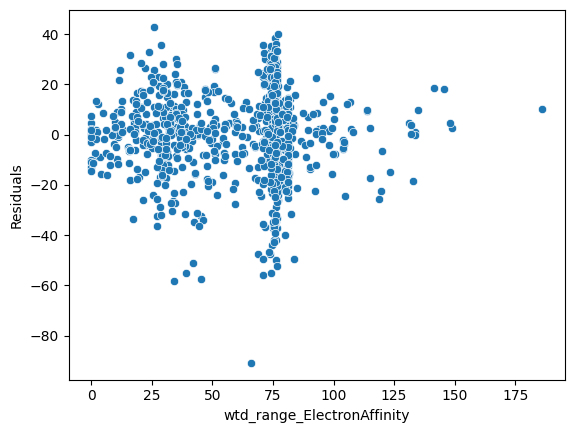

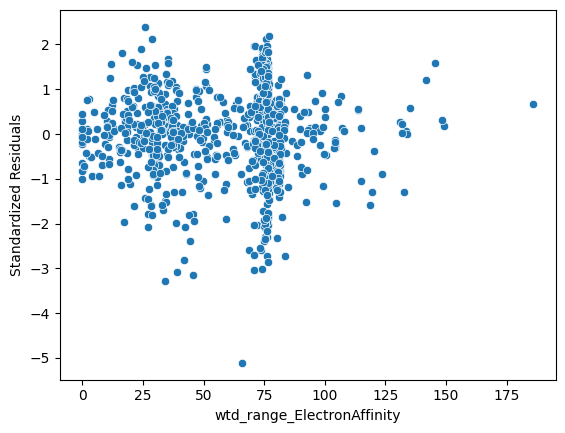


Correlation of residuals for wtd_range_ElectronAffinity
0.0036812929591521085


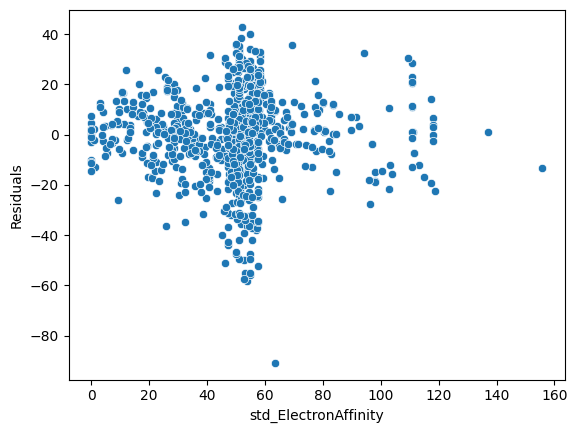

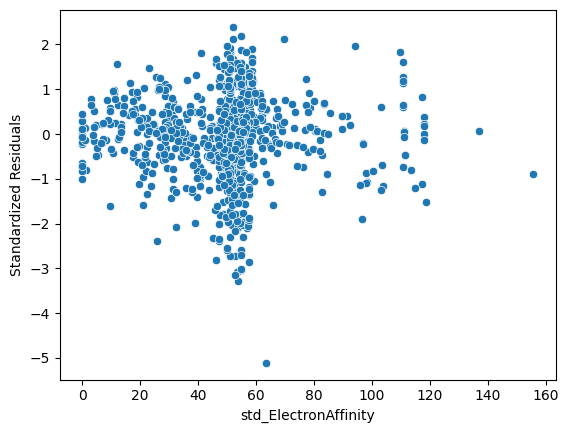


Correlation of residuals for std_ElectronAffinity
-0.0022694355650843506


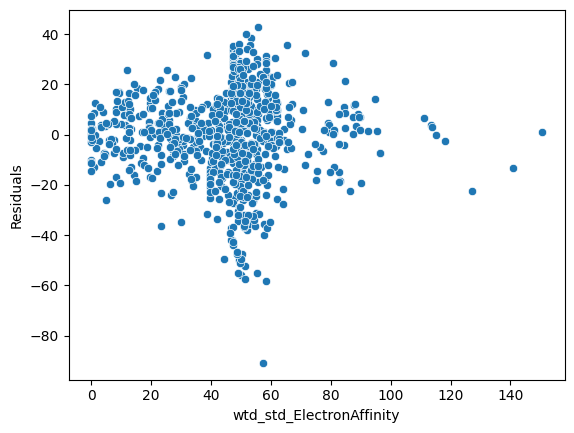

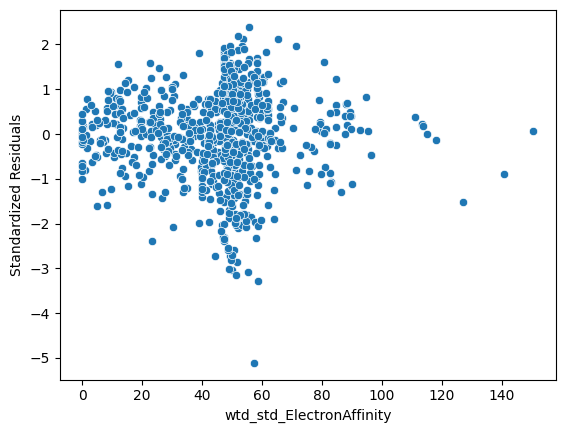


Correlation of residuals for wtd_std_ElectronAffinity
0.00039623996220851236


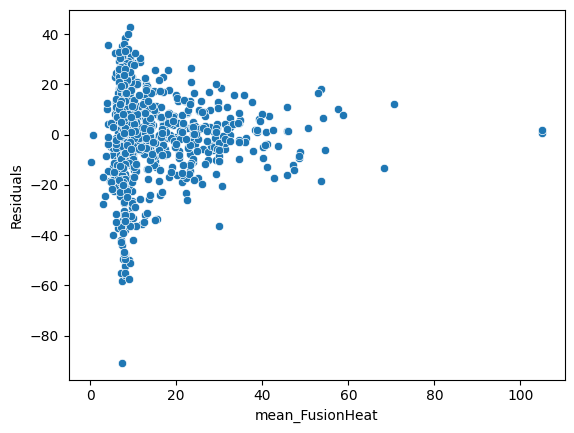

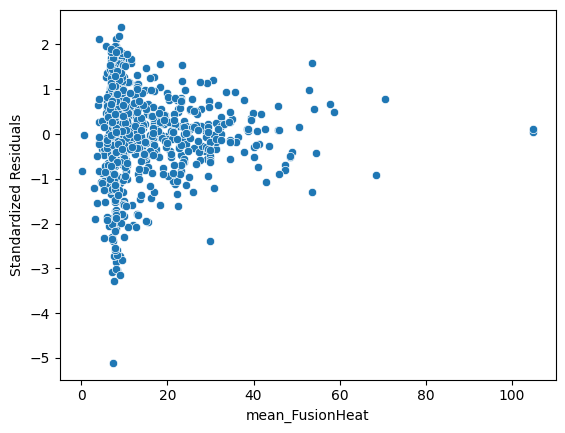


Correlation of residuals for mean_FusionHeat
0.004495929077677024


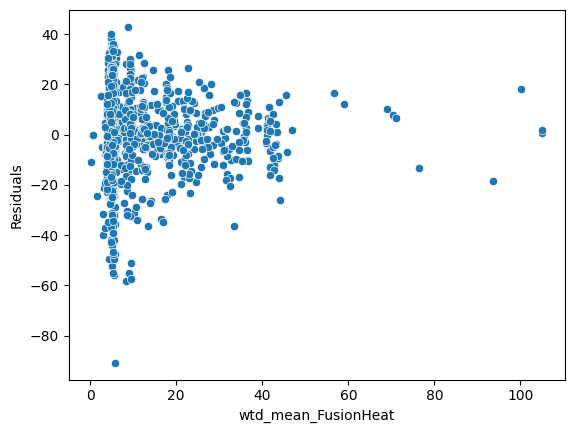

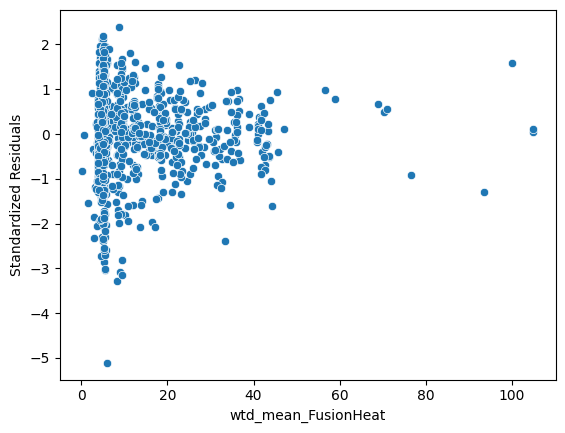


Correlation of residuals for wtd_mean_FusionHeat
0.0039862282514213955


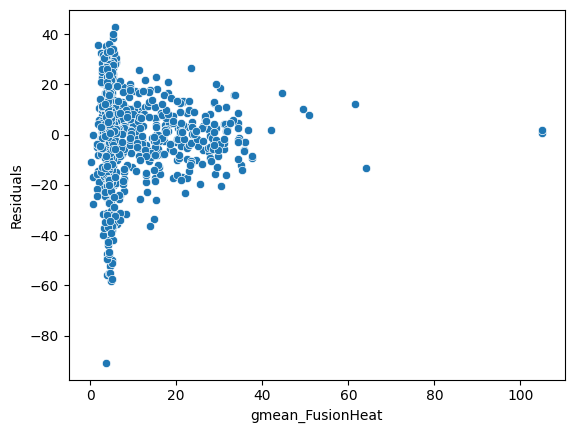

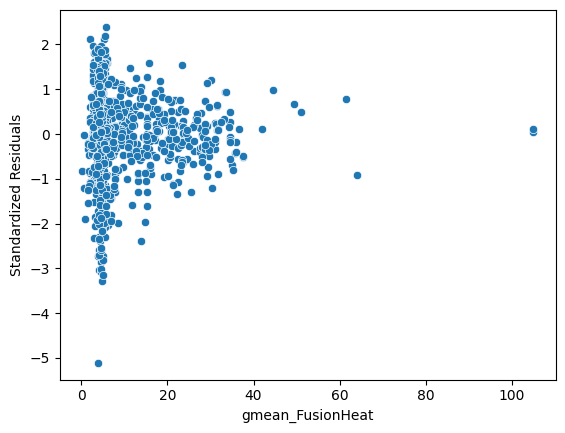


Correlation of residuals for gmean_FusionHeat
0.0029285919008165146


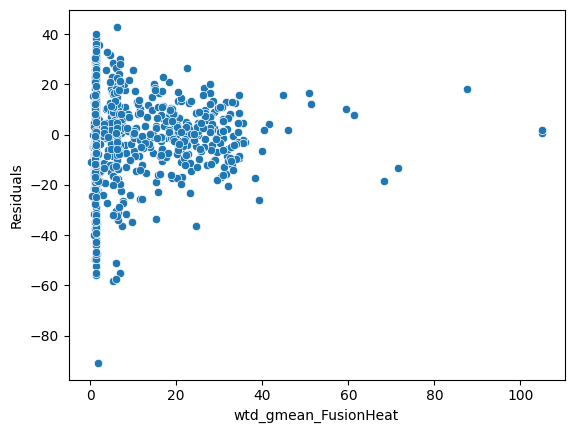

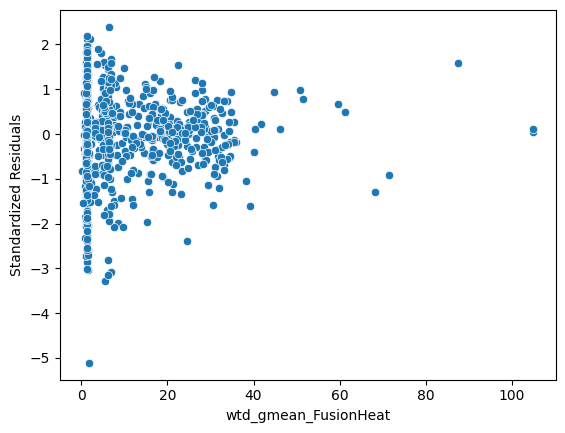


Correlation of residuals for wtd_gmean_FusionHeat
0.003156658649114673


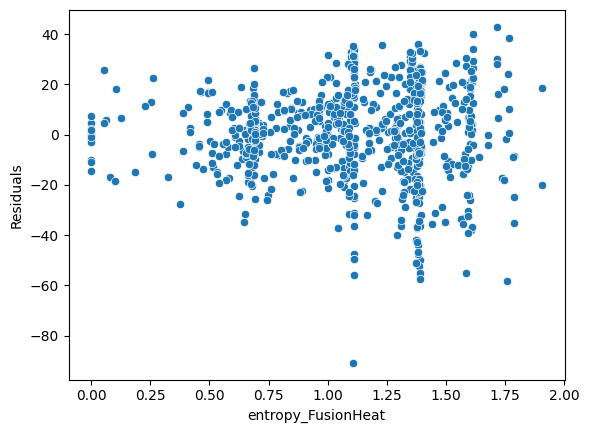

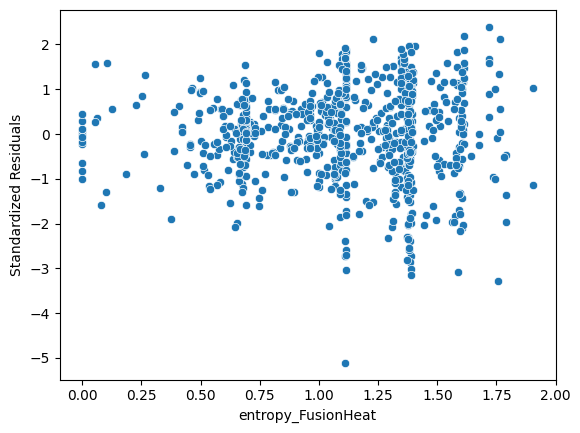


Correlation of residuals for entropy_FusionHeat
0.005966252199665719


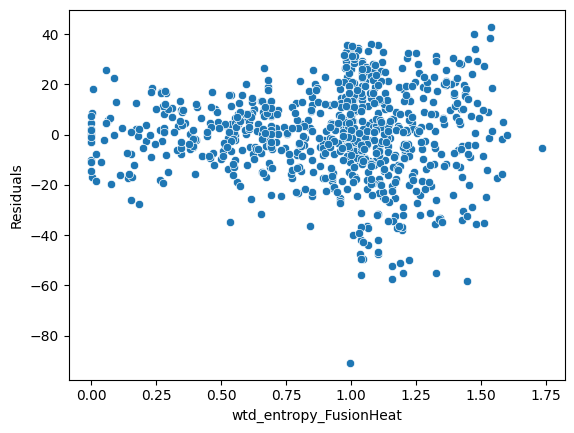

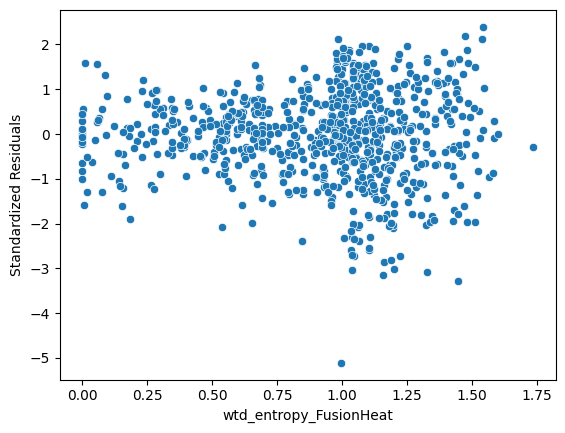


Correlation of residuals for wtd_entropy_FusionHeat
0.005278599188564454


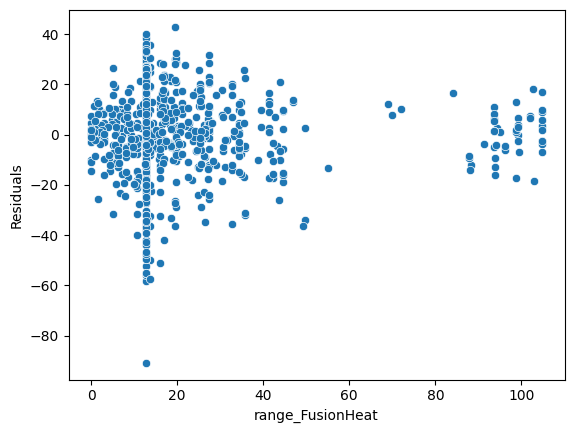

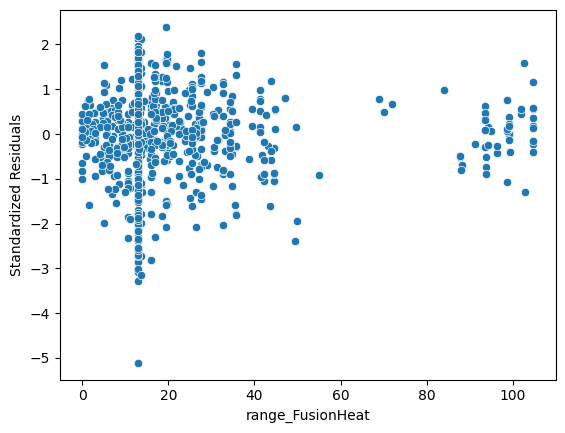


Correlation of residuals for range_FusionHeat
0.004857710794232431


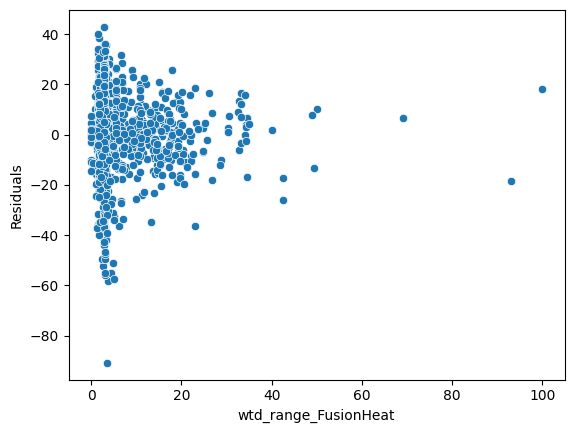

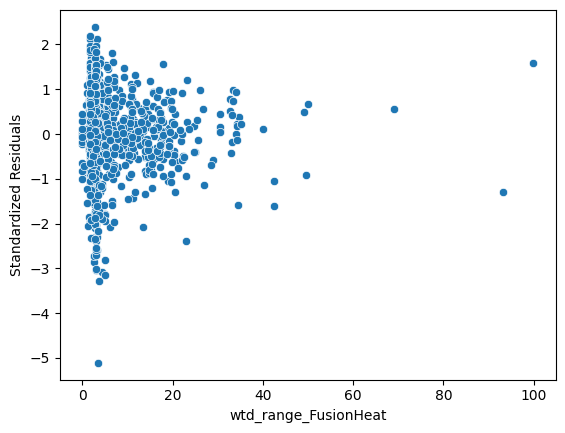


Correlation of residuals for wtd_range_FusionHeat
0.003608270013149586


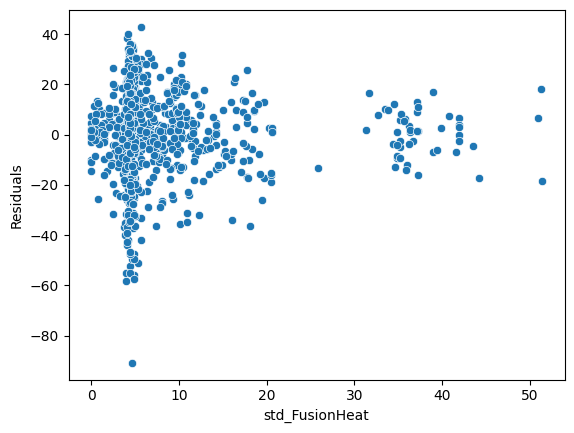

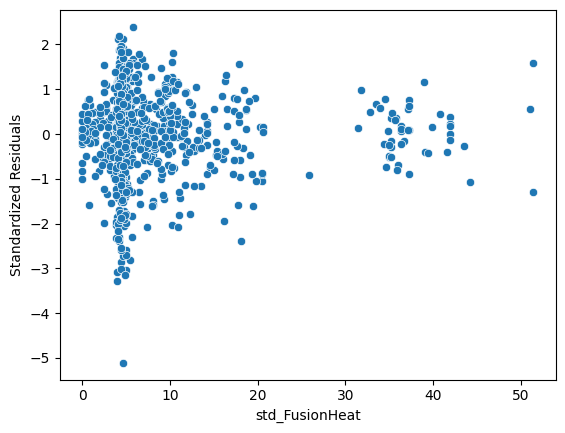


Correlation of residuals for std_FusionHeat
0.004842307029163946


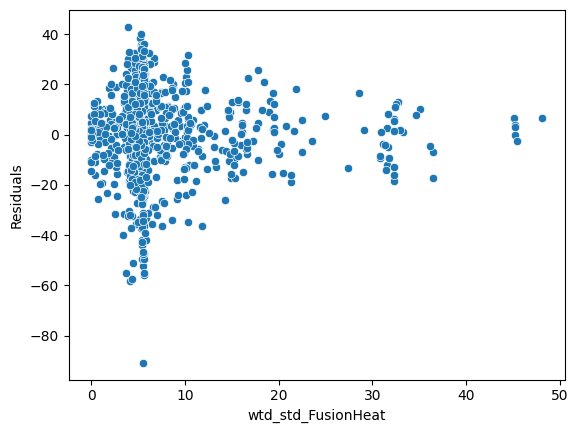

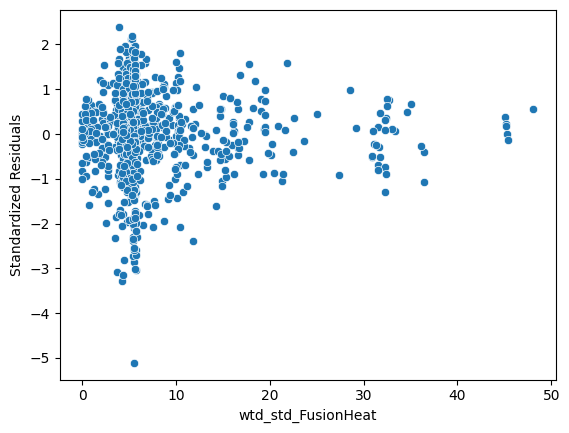


Correlation of residuals for wtd_std_FusionHeat
0.003896091674763239


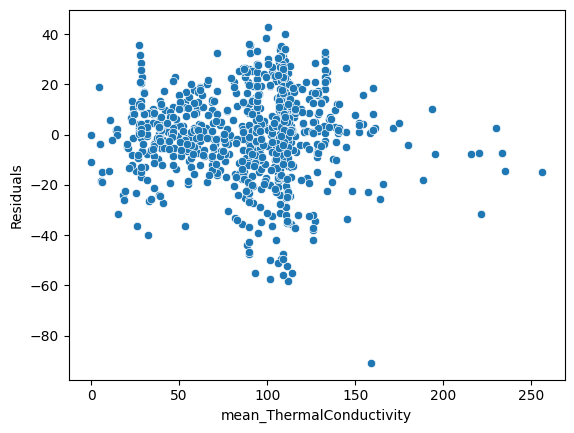

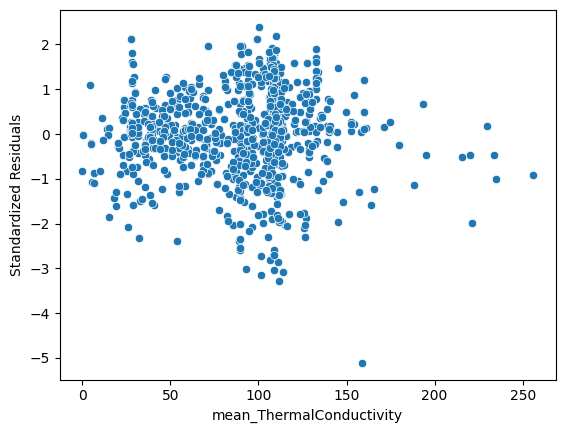


Correlation of residuals for mean_ThermalConductivity
0.00023991069686639735


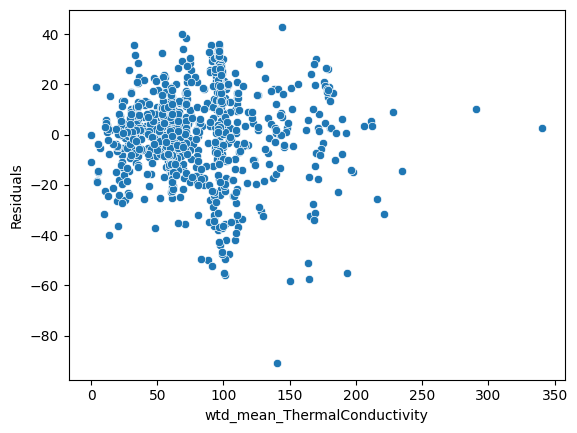

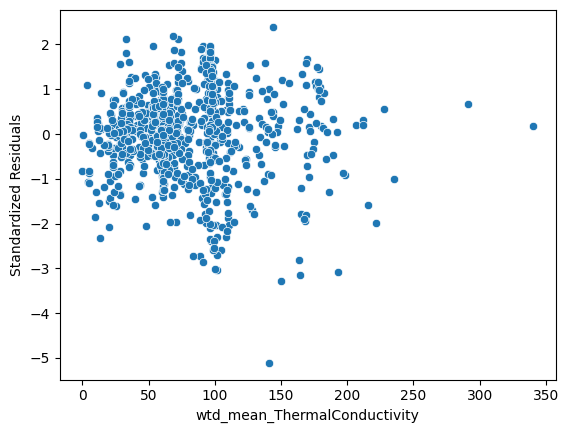


Correlation of residuals for wtd_mean_ThermalConductivity
-4.4574514738404594e-05


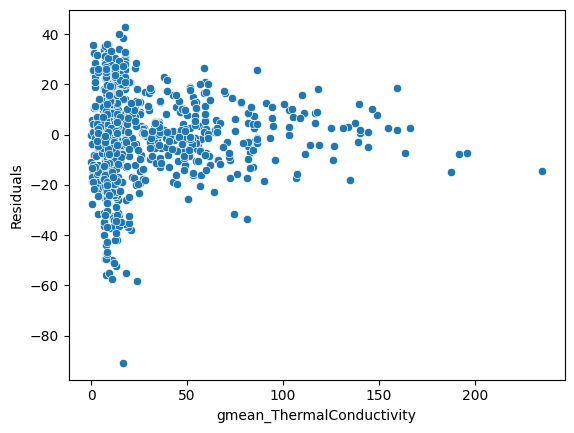

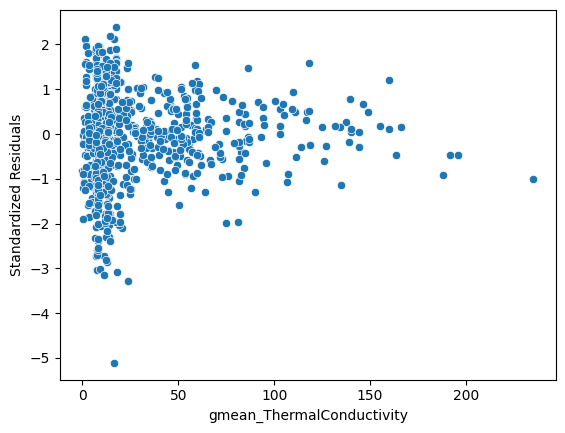


Correlation of residuals for gmean_ThermalConductivity
0.0022966570130613165


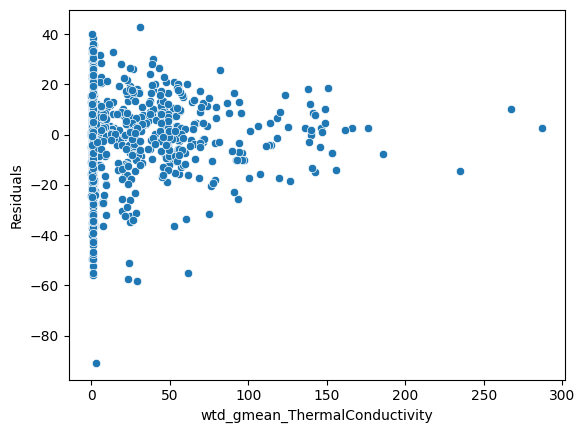

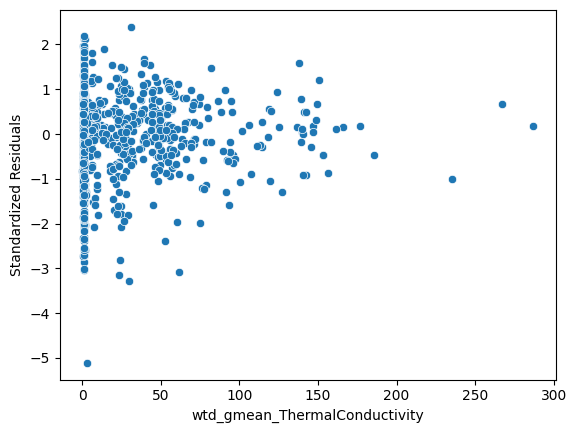


Correlation of residuals for wtd_gmean_ThermalConductivity
0.0015207620533781233


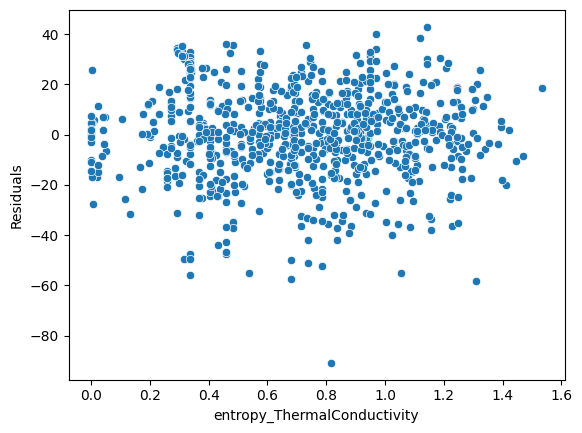

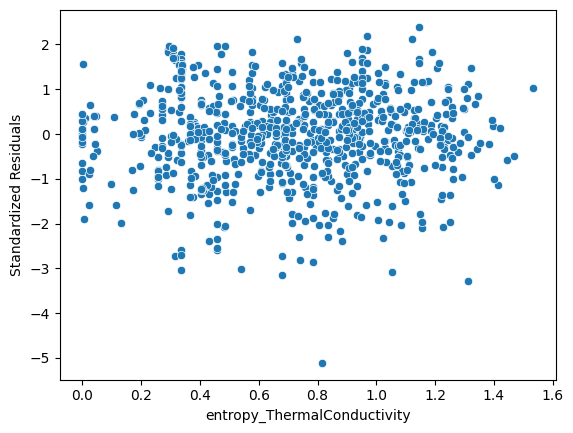


Correlation of residuals for entropy_ThermalConductivity
0.006454640328672564


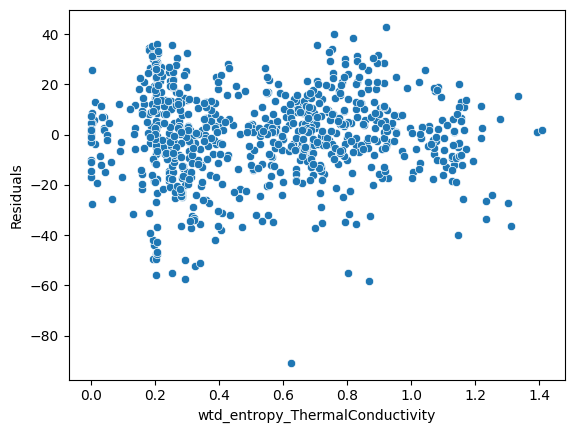

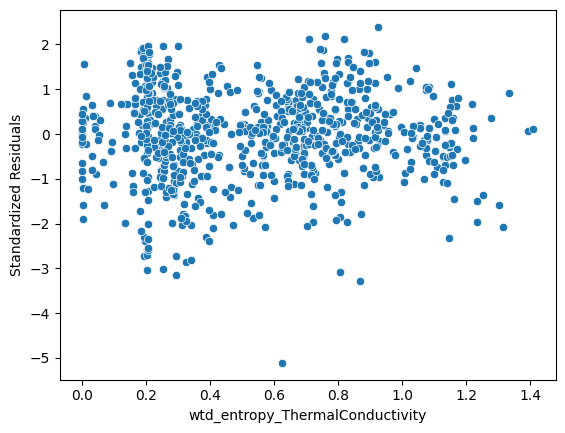


Correlation of residuals for wtd_entropy_ThermalConductivity
0.0032493325598344676


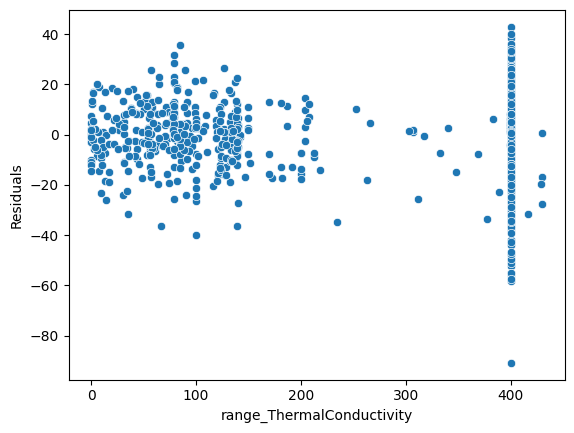

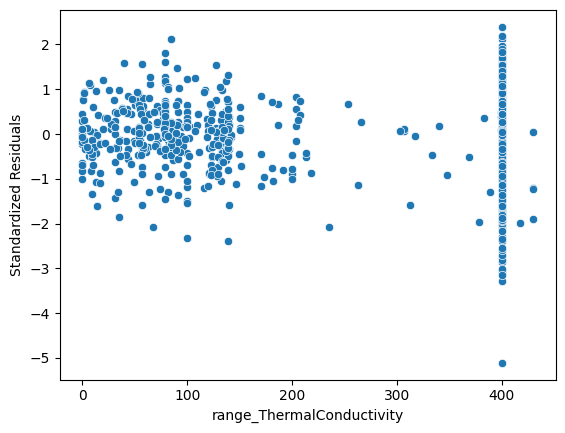


Correlation of residuals for range_ThermalConductivity
0.0007985464526194738


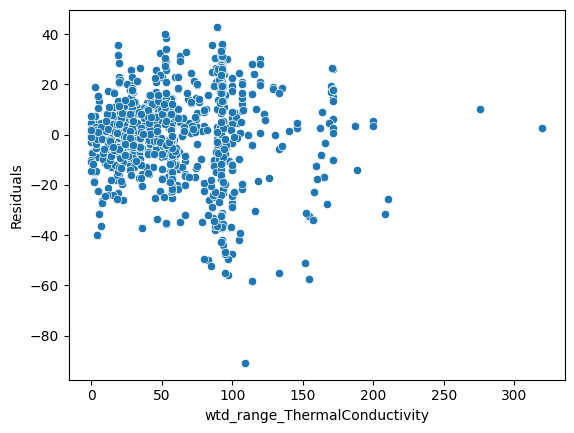

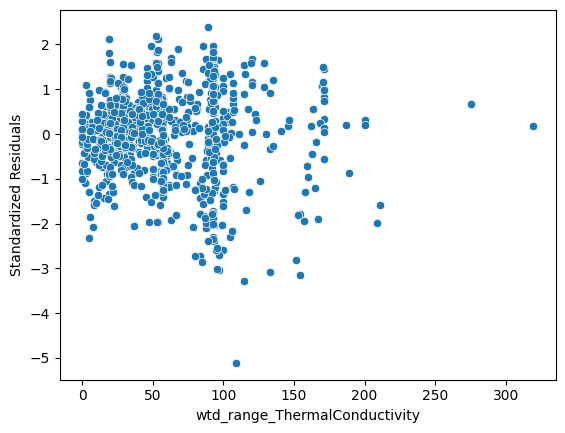


Correlation of residuals for wtd_range_ThermalConductivity
0.0010380271768051126


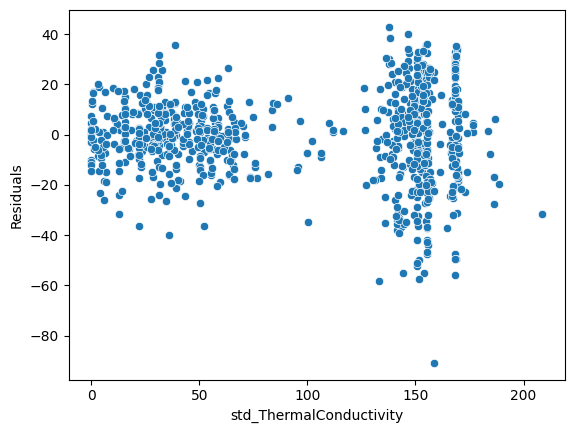

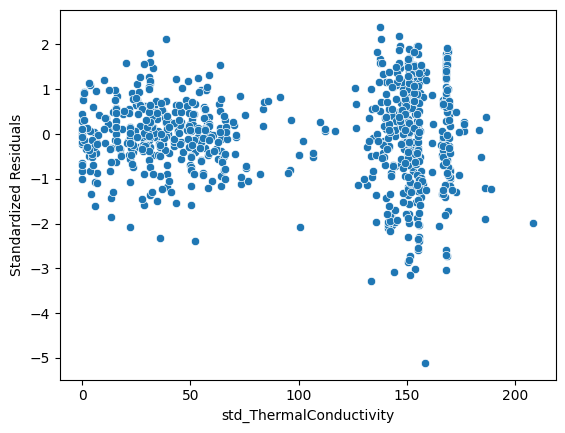


Correlation of residuals for std_ThermalConductivity
-0.0003919434565888072


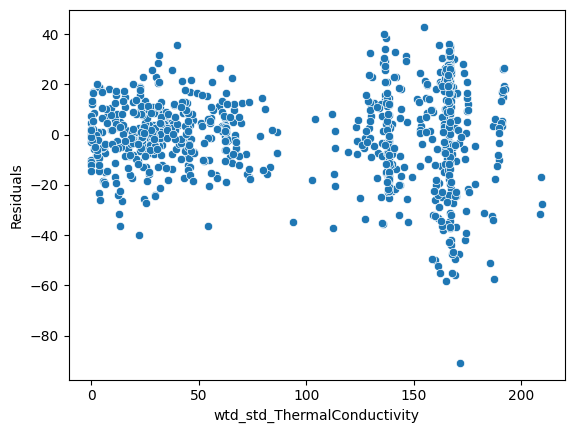

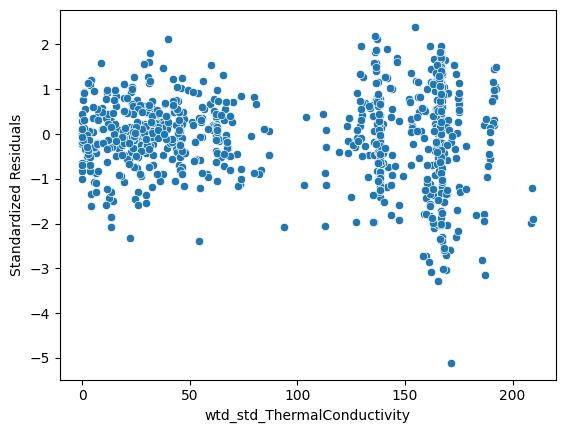


Correlation of residuals for wtd_std_ThermalConductivity
4.724712305212084e-05


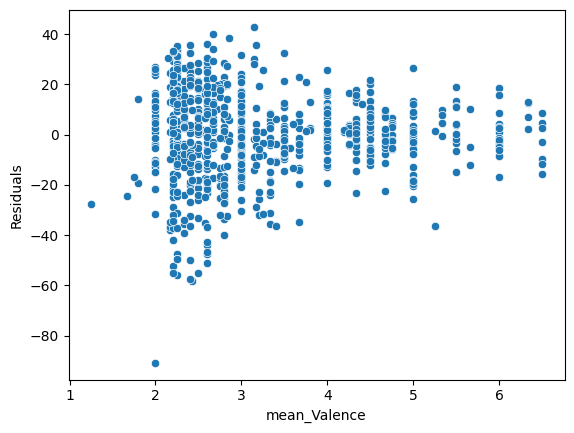

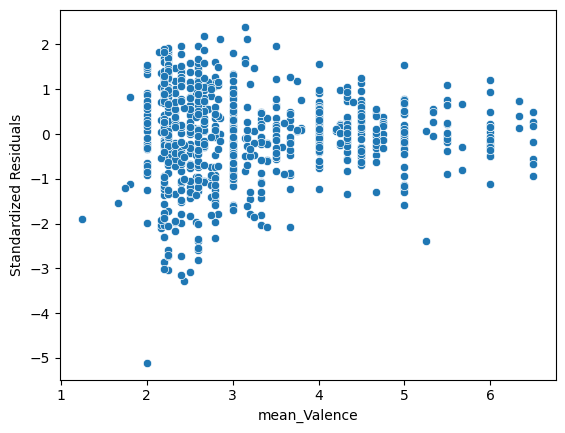


Correlation of residuals for mean_Valence
0.001334276583570708


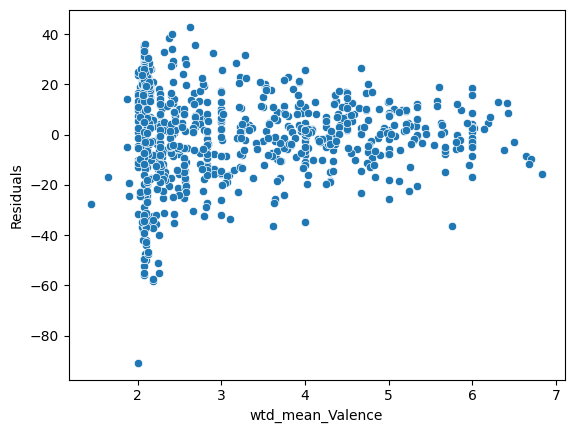

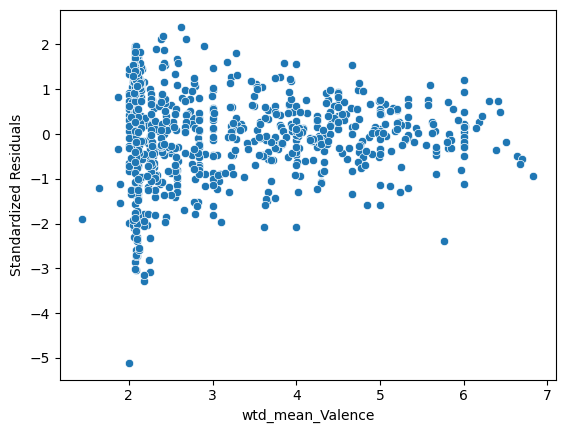


Correlation of residuals for wtd_mean_Valence
-0.00019712798659758494


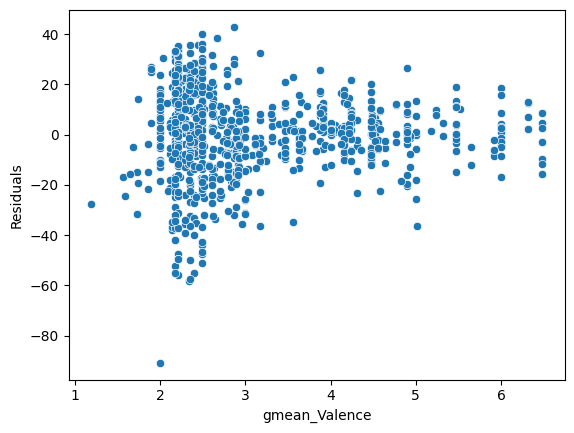

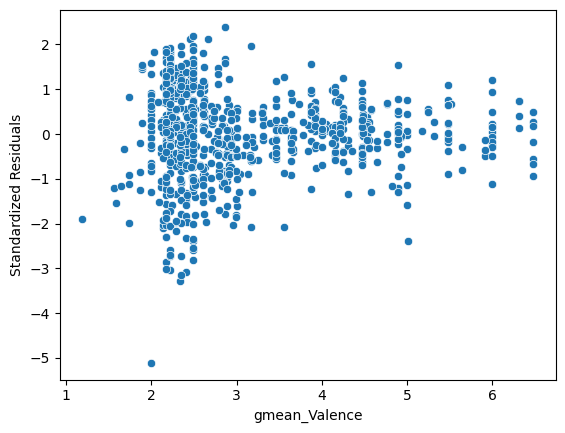


Correlation of residuals for gmean_Valence
0.001565291119048618


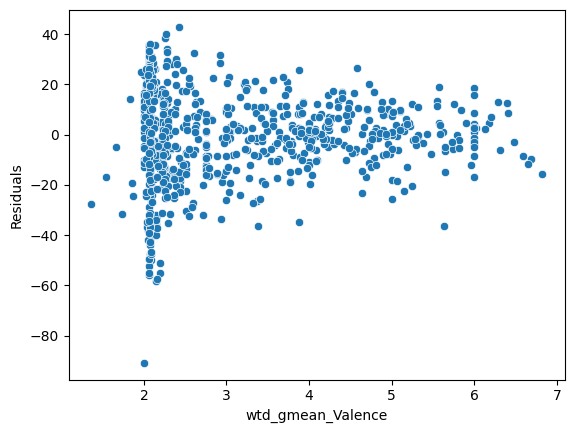

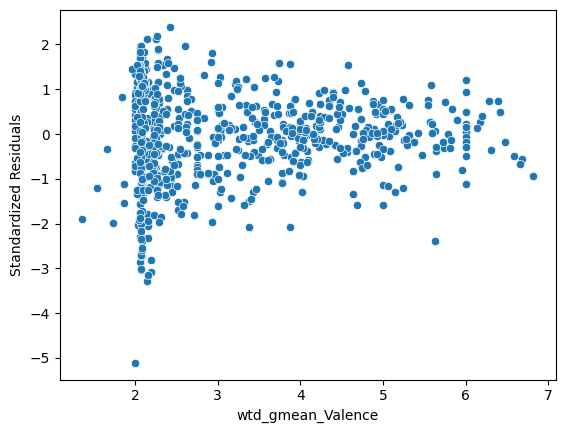


Correlation of residuals for wtd_gmean_Valence
-0.0002282894845511592


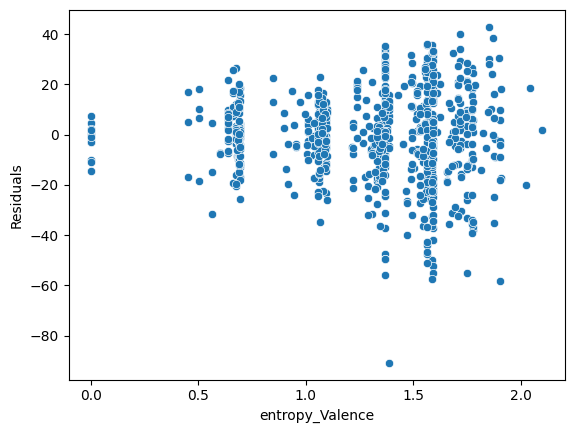

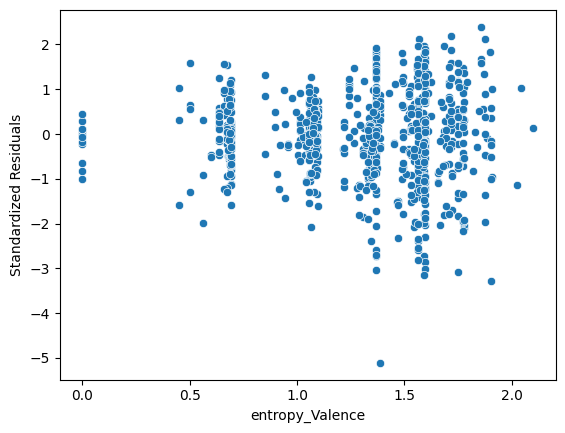


Correlation of residuals for entropy_Valence
0.004432542150151615


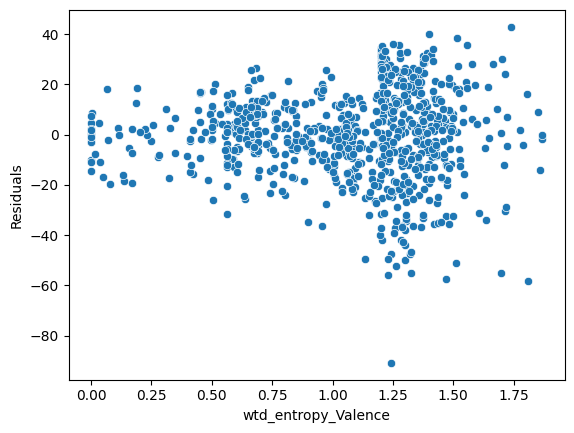

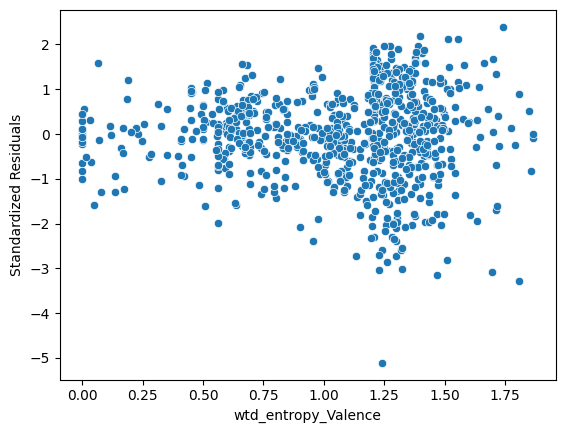


Correlation of residuals for wtd_entropy_Valence
0.004634820709678647


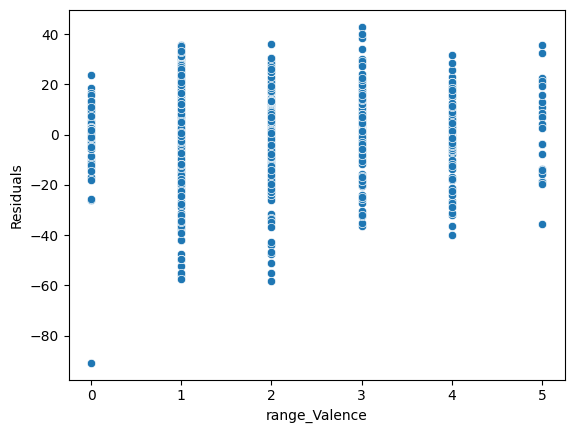

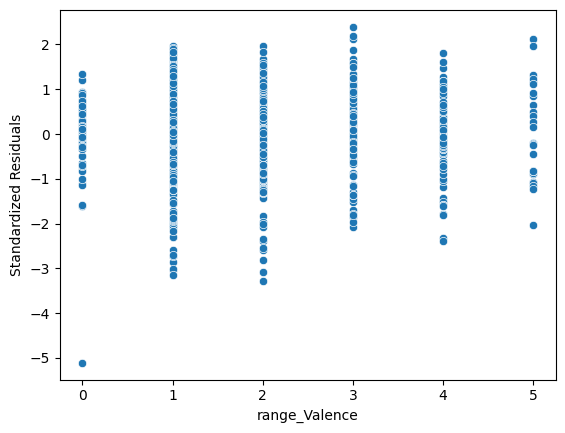


Correlation of residuals for range_Valence
0.000628432081173913


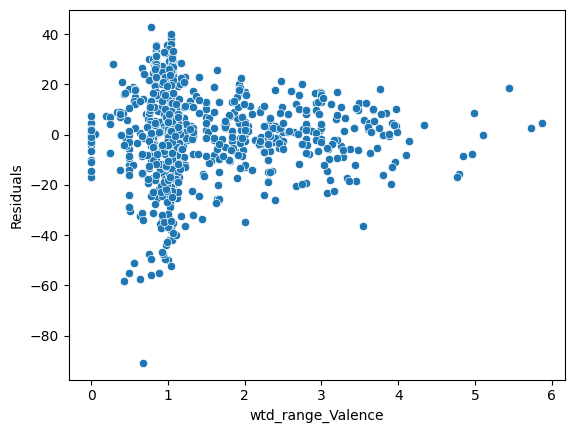

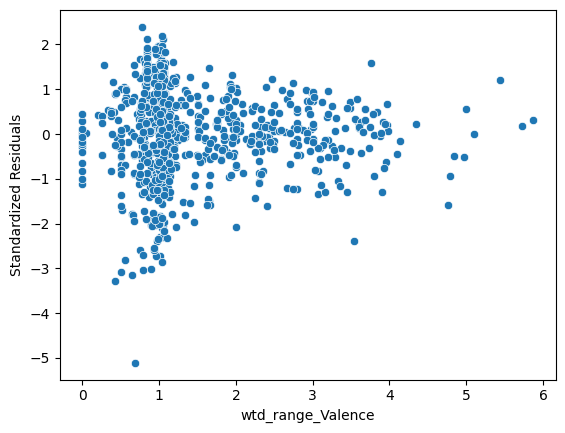


Correlation of residuals for wtd_range_Valence
-0.0008144293525133078


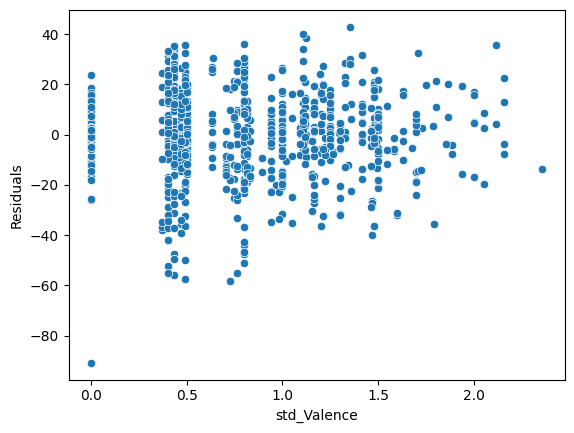

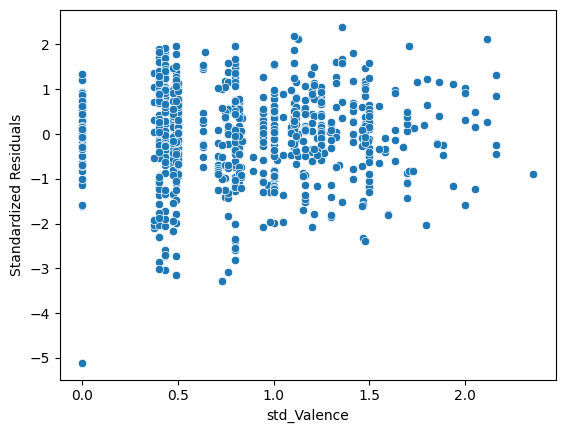


Correlation of residuals for std_Valence
0.0004643243527925958


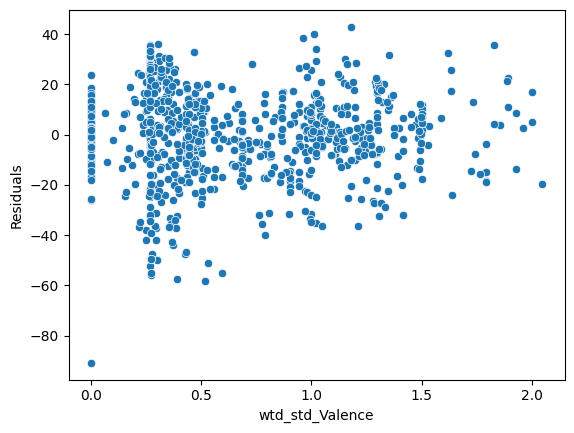

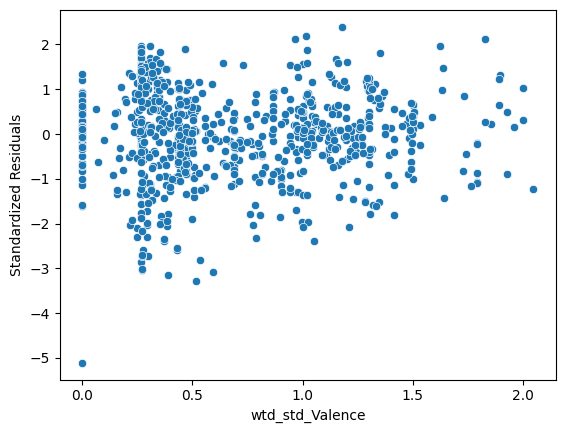


Correlation of residuals for wtd_std_Valence
0.0018214232064069913
F Statistic and P-Value [('F statistic', 0.8687822165576693), ('p-value', 0.8951986186264409)]


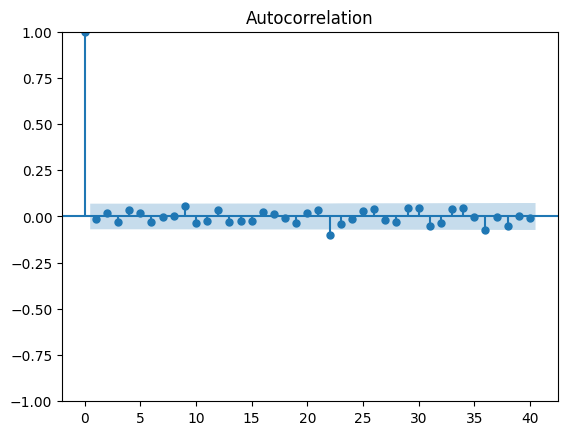

In [40]:
#Plot for train dataset
ols_model_diagnostics_stat(x_train.columns,stadardize_x_train,y_train)

##### (c) Fit Principal Components Regression (PCR) and Partial Least-Squares (PLS) model to the training dataset. Report on the optimal number of components in both models based on R2.Generate necessary plots to compare the performance of different models with the components.

In [53]:
# n_components must be between 0 and min(n_samples, n_features)
max_n_Comp = 81
optimal_n_Comp_PCR = 80
optimal_n_Comp_PLS = 80

PC Value [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80]


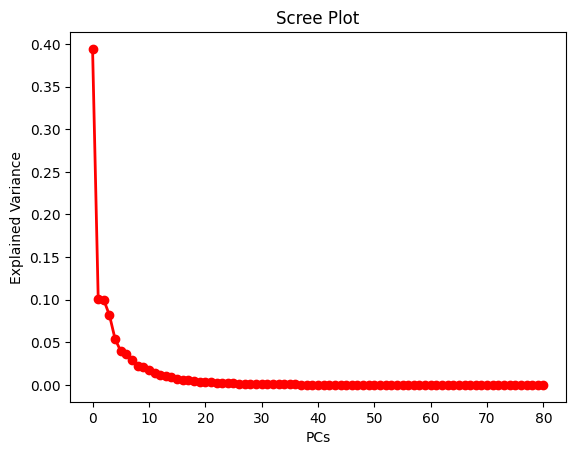

Explained Variance Ratio : [3.94129062e-01 1.00885781e-01 9.95854791e-02 8.15983430e-02
 5.37040135e-02 3.97115564e-02 3.68349796e-02 2.97936001e-02
 2.18163159e-02 2.06739733e-02 1.76154412e-02 1.45206271e-02
 1.14310319e-02 1.07306731e-02 9.09740587e-03 7.50117738e-03
 6.28184826e-03 5.87866358e-03 4.49151735e-03 3.92331624e-03
 3.45529074e-03 2.99234972e-03 2.48669313e-03 2.10078056e-03
 1.96573509e-03 1.72946622e-03 1.52255053e-03 1.26955943e-03
 1.19779034e-03 1.08283268e-03 8.65654240e-04 8.50685178e-04
 7.55691342e-04 7.33839439e-04 7.26068402e-04 6.14715033e-04
 5.62730098e-04 4.65357593e-04 4.48598129e-04 4.12844216e-04
 3.19142846e-04 2.94197937e-04 2.46896173e-04 2.27457044e-04
 2.15169068e-04 1.98008526e-04 1.94341385e-04 1.88759284e-04
 1.70359305e-04 1.54370334e-04 1.45083324e-04 1.24361968e-04
 1.18105123e-04 1.05456058e-04 9.83507439e-05 8.27894083e-05
 7.86372529e-05 7.26368887e-05 7.02536882e-05 6.07238450e-05
 5.07877766e-05 4.78144360e-05 3.89593000e-05 3.73619724e-

In [60]:
from sklearn.decomposition import PCA
#setting the maximum number as PC
pca = PCA(n_components=max_n_Comp)
pca.fit(stadardize_x_train)

PC_val = np.arange(pca.n_components_)
print('PC Value', PC_val)
#scree plot
plt.plot(PC_val, pca.explained_variance_ratio_, 'o-', linewidth=2, color='red')
plt.title('Scree Plot')
plt.xlabel('PCs')
plt.ylabel('Explained Variance')
plt.show()
print('Explained Variance Ratio :', pca.explained_variance_ratio_)
print('Explained Variance:', pca.explained_variance_)

explained_var = pca.explained_variance_ratio_
cum_var = [np.sum(explained_var[:i+1]) for i in range(len(explained_var))]
print('Cumulative Variance : ', cum_var)
num_pcs = 0
for i in cum_var:
  num_pcs +=1
  if i>0.90:
    break
print("Number of PCs is require: ",num_pcs)

In [67]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
pcr = make_pipeline(StandardScaler(), PCA(n_components=optimal_n_Comp_PCR), LinearRegression())
pcr.fit(stadardize_x_train, y_train)
pca = pcr.named_steps["pca"]
pcr_predict=pcr.predict(stadardize_x_train)
# print(pcr_predict)

In [80]:
#Performance checking for PCR components
print('Finding optimal value for PCR')
prev_score_val = 0
for ncomp in range(1,13):
    optimal_n_Comp_PCR = ncomp
    pcr = make_pipeline(StandardScaler(), PCA(n_components=optimal_n_Comp_PCR), LinearRegression())
    pcr.fit(stadardize_x_train, y_train)
    score_val = pcr.score(stadardize_x_train, y_train)
    if score_val > prev_score_val:
      prev_score_val = score_val
      optim = ncomp
print("Optimal value for the coponent is:",optim)
    

Finding optimal value for PCR
12


In [66]:
from sklearn.cross_decomposition import PLSRegression
pls = PLSRegression(n_components=optimal_n_Comp_PLS)
pls.fit(stadardize_x_train, y_train)
pls_predict=pcr.predict(stadardize_x_train)
# print(pls_predict)

In [81]:
#Verifying the performance of PLS for different N_component
print('Finding optimal value for PLS')
prev_score_val =0
for ncomp in range(1,13):
    optimal_n_Comp_PLS = ncomp
    pls = PLSRegression(n_components=optimal_n_Comp_PLS)
    pls.fit(stadardize_x_train, y_train)
    score_val = pls.score(stadardize_x_train, y_train)
    if score_val > prev_score_val:
      prev_score_val = score_val
      optim = ncomp
print("Optimal value for the coponent is:",optim)

Finding optimal value for PLS
Optimal value for the coponent is: 12


In [68]:
print(f"R-squared for PCR {pcr.score(stadardize_x_train, y_train)}")
print(f"R-squared for PLS {pls.score(stadardize_x_train, y_train)}")

R-squared for PCR 0.5896614851600723
R-squared for PLS 0.7496173745667716


##### (d) Fit a LASSO and Ridge regressor to the training dataset. Report on the optimal value of regularization term α based on R2.

In [85]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.pipeline import Pipeline

In [86]:
# Running a Ridge Regression model
ridge = Ridge(alpha = 0.01)
ridge_sc = Pipeline([('standardize', StandardScaler()),('Ridge', ridge)])
ridge_sc.fit(x_train, y_train)


Pipeline(steps=[('standardize', StandardScaler()),
                ('Ridge', Ridge(alpha=0.01))])

In [87]:
# Running a Ridge Regression model
lasso = Lasso(alpha = 0.1)
lasso_sc = Pipeline([('standardize', StandardScaler()),('Lasso', lasso)])
lasso_sc.fit(x_train, y_train)

Pipeline(steps=[('standardize', StandardScaler()), ('Lasso', Lasso(alpha=0.1))])

In [93]:
for alpha in [100,10,1,0,0.01,0.001,0.0001, 0.00001]: 
    ridge = Ridge(alpha = alpha)
    ridge_sc = Pipeline([('standardize', StandardScaler()),('Ridge', ridge)])
    ridge_sc.fit(x_train, y_train)
    print(f'Coefficient of Ridge Regression for {alpha} is', ridge_sc[1].coef_, sep=':')

df_ridge_comp=[]
df_coeff_comp=[]
for alpha in [100,10,1,0,0.01,0.001,0.0001, 0.00001]:    
    ridge = Ridge(alpha = alpha)
    ridge_sc = Pipeline([('standardize', StandardScaler()),('Ridge', ridge)])
    ridge_sc.fit(x_train, y_train)
    ridge_predict=ridge_sc.predict(x_train)
    dict_ridge_alph = {
        'Alpha': alpha,
        'R-squared for the train':r2_score(y_train, ridge_predict)
    }
    df_ridge_comp.append(dict_ridge_alph)
    
df_ridge_comp = pd.DataFrame(df_ridge_comp)    
display(df_ridge_comp)

Coefficient of Ridge Regression for 100 is:[[ 2.53788179e+00  1.63796154e+00 -8.20742221e-01 -8.80528067e-02
  -9.84680636e-02 -5.45966056e-01  4.08050267e+00  3.59556003e+00
  -8.99798244e-01  3.03965202e+00 -2.98001920e+00  1.24909668e+00
  -9.29113317e-02  4.59187819e-01 -5.36226260e-01  3.68245590e-01
   5.63838862e-01  2.41466959e+00 -9.45359282e-01  8.52418019e-02
  -4.54595883e-01  1.82298737e-01  2.30229862e+00 -1.08317143e+00
   5.71109606e-01  2.59858762e-01  2.52922623e+00  3.85348829e+00
  -2.12601242e+00  2.62059476e-01  1.70886831e+00 -5.70816970e-01
  -4.69341829e-01 -1.37823888e+00  4.81662011e-01 -1.07457518e+00
  -3.68623261e-02  1.41909725e+00  1.36530922e+00  5.35324472e-01
  -3.40101275e+00  3.47495720e-01  1.73747812e+00 -8.38287799e-01
  -3.52563642e+00 -3.90332093e+00 -5.03548034e+00 -2.16863636e+00
  -2.16868743e+00  9.22975223e-01  1.22755411e+00  3.51213940e-01
  -9.30330491e-02 -3.23968751e-03  1.30361212e-01 -4.41906647e-01
   1.82430731e+00 -6.52899523e-01

Alpha  R-squared for the train
0  100.00000                 0.682671
1   10.00000                 0.719700
2    1.00000                 0.742653
3    0.00000                 0.749617
4    0.01000                 0.749567
5    0.00100                 0.749617
6    0.00010                 0.749617
7    0.00001                 0.749617

In [95]:
for alpha in [100,10,1,0,0.01,0.001,0.0001, 0.00001]: 
    lasso = Lasso(alpha = alpha)
    lasso_sc = Pipeline([('standardize', StandardScaler()),('Lasso', lasso)])
    lasso_sc.fit(x_train, y_train)
    print(f'Coefficient of Lasso Regression for {alpha} is', lasso_sc[1].coef_, sep=':')

df_lasso_comp=[]
df_coeff_comp=[]
for alpha in [100,10,1,0,0.01,0.001,0.0001, 0.00001]:    
    lasso = Lasso(alpha = alpha)
    lasso_sc = Pipeline([('standardize', StandardScaler()),('Lasso', lasso)])
    lasso_sc.fit(x_train, y_train)
    lasso_predict=lasso_sc.predict(x_train)
    dict_lasso_alph = {
        'Alpha': alpha,
        'R-squared for the train':r2_score(y_train, lasso_predict),
    }
    df_lasso_comp.append(dict_lasso_alph)
    
df_lasso_comp = pd.DataFrame(df_lasso_comp)    
display(df_lasso_comp)

Coefficient of Lasso Regression for 100 is:[ 0. -0. -0. -0. -0.  0.  0.  0. -0.  0.  0.  0.  0. -0.  0.  0.  0.  0.
  0.  0.  0.  0. -0. -0. -0.  0.  0.  0. -0.  0.  0. -0. -0. -0. -0.  0.
  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0.  0.  0.  0.  0. -0. -0. -0.
 -0.  0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0.  0.  0.  0.  0. -0.
 -0. -0. -0.  0.  0. -0. -0. -0. -0.]
Coefficient of Lasso Regression for 10 is:[ 0.         -0.         -0.         -0.         -0.          0.
  3.21703372  0.         -0.          0.          0.          0.
  0.         -0.          0.          0.          0.          0.
  0.          0.          0.          0.         -0.         -0.
 -0.          0.          0.          1.46342585 -0.          0.
  0.         -0.         -0.         -0.         -0.          0.
  0.          0.         -0.          0.          0.         -0.
 -0.         -0.         -0.          0.          0.          0.
  0.          0.          0.         -0.         -0.         -0.


/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py:405: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.249e+05, tolerance: 9.830e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordin

Coefficient of Lasso Regression for 0.01 is:[ -1.6376471   15.32920737 -11.38625073  -5.22429106  -0.37233571
  -8.82294975   2.08063363   4.20359667   3.00468963   0.
  -5.50545419  33.76129142   0.         -30.91614861  -0.96743021
  -0.22845804   4.50512749  16.9842181   -1.06092392 -14.73441277
  -9.957936    17.20721486  20.26611004 -26.73682687 -13.48684081
   2.79888489  24.35623689  19.72925259  -2.462988   -31.61409771
  16.22917948  -5.03208895  -8.49014668  -6.67676919  23.37317355
   5.11370458  -2.52387485  -1.31498361  -0.95511805   4.09178128
  -0.23497298  -4.76182759  23.87264316   6.29949719 -23.79521684
  -4.48739325  -3.38124572 -24.80217424  -4.23076083  25.94256606
  -9.99595023   1.66260323  -6.07660972   1.39291635   0.72796353
  -5.72188062   6.19977963 -12.29294526   5.12179495  10.47065535
  -1.63802319   6.41821437  17.22711868  -9.33036307  -8.76439124
   2.32309545  -0.60209542 -13.59483998  -7.02531792   8.52592484
  -0.          -3.62712212  -2.50244177 

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.248e+05, tolerance: 9.830e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py:405: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the numbe

Coefficient of Lasso Regression for 1e-05 is:[ -3.25967815  21.13413302 -15.76774513 -10.22849817   3.20394949
 -10.7433712    3.71491036   5.73155534   3.9895198   -3.41186891
  -4.33897562  45.88401264   7.60799989 -42.23028658  -6.60501311
   0.51913254   6.19914229  17.70137521  -2.1315973  -19.8731225
 -10.06753351  21.16215161  23.34407376 -31.09172315 -17.02122267
   2.00609725  24.00590615  20.54374339  -2.84523943 -35.30891919
  17.33427688  -7.12984941  -9.00459189  -8.43328731  28.74792674
   7.21307108  -3.36457211  -3.86671357  -2.51178754   7.38561192
   0.24419972  -8.17706698  27.46852083   9.74961043 -27.42161453
  -6.08621705  -2.22721149 -26.39003271  -3.60692883  28.96329216
 -12.21717296   5.35294886 -13.19697288  -0.89654609   5.8923165
  -7.44892737   6.3349459  -16.49879297   5.95483785  13.26615359
  -0.52846436   5.3684596   21.19337619  -8.40984258 -11.73467444
   3.96137572  -2.28514582 -15.37524915  -8.42319697  14.74319059
  -5.94307375 -10.28908938   3.56

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.779e+04, tolerance: 9.830e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.184e+05, tolerance: 9.830e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.242e+05, tolerance: 9.830e+01

Alpha  R-squared for the train
0  100.00000                 0.000000
1   10.00000                 0.442447
2    1.00000                 0.649983
3    0.00000                 0.745945
4    0.01000                 0.743834
5    0.00100                 0.745853
6    0.00010                 0.745938
7    0.00001                 0.745945

##### (e) Fit a support vector regressor (SVR) using the polynomial kernel and report on the optimal value for the degree and C based on R2
.

In [113]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {'C': [0.1, 1, 10], 'degree': [2, 3, 4]}
# Initialize an SVR with polynomial kernel
svr = SVR(kernel='poly')
# Initialize a GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(svr, param_grid, cv=5)
# Fit the grid search to the training data
grid_search.fit(x_train, np.ravel(y_train))
# Print the best hyperparameters and R-squared score
print("Best hyperparameters:", grid_search.best_params_)
y_pred = grid_search.predict(x_test)
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

Best hyperparameters: {'C': 10, 'degree': 2}
R-squared score: 0.23460694913483437


##### (f) Implement a neural network regression model in PyTorch, containing two hidden layers with ReLU activation and a dropout layer between them. Train the model for 10 epochs.

##### (g) Visualize the performance of all the models in terms of R2 and RMSE values for the validation dataset.

In [115]:
import torch
import torch.nn as nn
import torch.optim as optim

In [120]:
# Convert the data to PyTorch tensors
X_train = torch.tensor(x_train.values, dtype=torch.float32)
X_test = torch.tensor(x_test.values, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Define the neural network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(81, 256)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(256, 128)
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(128, 1)
        
    def forward(self, x):
        x = self.fc1(x)
        x = nn.ReLU()(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = nn.ReLU()(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

# Initialize the neural network
net = Net()

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Train the neural network
for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(zip(X_train, y_train), 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, loss: {running_loss}")

<ipython-input-120-1d3c70f651f0>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.float32)
<ipython-input-120-1d3c70f651f0>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test = torch.tensor(y_test, dtype=torch.float32)
/usr/local/lib/python3.9/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1, loss: 22451134.79847776
Epoch 2, loss: 1731552.3876439533
Epoch 3, loss: 1174194.4210686567
Epoch 4, loss: 1037746.143978102
Epoch 5, loss: 914594.0085847125
Epoch 6, loss: 933540.390848326
Epoch 7, loss: 1008076.2774211674
Epoch 8, loss: 955555.2016381682
Epoch 9, loss: 950736.1977813279
Epoch 10, loss: 1036211.3702415624


In [127]:
# Initialize the neural network model
net = Net()

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

# Train the model for 10 epochs
for epoch in range(10):
    # Forward pass
    y_pred = net(X_train)
    loss = criterion(y_pred, y_train)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Print the loss every 100 epochs
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/10], Loss: {loss.item():.4f}')

# Evaluate the model on the test set
with torch.no_grad():
    y_pred = net(X_test)
    r2 = r2_score(y_test.squeeze(1), y_pred)
    mse = criterion(y_pred, y_test)
    print("R-squared score:", r2)
    print(f'Mean Squared Error: {mse.item():.4f}')
    rmse = np.sqrt(criterion(y_pred, y_test))
    print("RMSE:", rmse)



R-squared score: -15.923680251009365
Mean Squared Error: 17675.7344
RMSE: tensor(132.9501)


/usr/local/lib/python3.9/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([800, 1, 1])) that is different to the input size (torch.Size([800, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.9/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([200, 1, 1])) that is different to the input size (torch.Size([200, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


##### (h) Choose the two best linear regression models and the SVR and Neural Network nonlinear regression models based on the previous subsection (g).

##### I have got good R2 value for ols model, but for lasso and ridge model also I am getting good r2 value. I am consider lasso is the good model for this case

##### (i) Use 5-fold cross-validation for these four models and compare these models using the RMSE values. Suggest the best model for this data set

In [131]:
from sklearn.metrics import mean_squared_error
# Define the parameter grid to search over
param_grid = {'C': [0.1, 1, 10], 'degree': [2, 3, 4]}
# Initialize an SVR with polynomial kernel
svr = SVR(kernel='poly')
# Initialize a GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(svr, param_grid, cv=5)
# Fit the grid search to the training data
grid_search.fit(x_train, np.ravel(y_train))
# Print the best hyperparameters and R-squared score
print("Best hyperparameters:", grid_search.best_params_)
y_pred = grid_search.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test.squeeze(1), y_pred))
print("RMSE value:", rmse)

Best hyperparameters: {'C': 10, 'degree': 2}
RMSE value: 28.47330732927598
